# HRV Parameter Extraction
This notebook is used for extracting HRV parameters from the peaks extracted in step 3.

To do:
- Calculate R-R intervals (done)
- Plot Frequency domain for HRV values (done)
- Extract SDNN (done)
- Extract pNN50 (done)
- Extract RMSSD (done)
- Extract Frequency domain parameters (done)
- Save these values in the folder associated with the patient (done)

## Initial setup

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

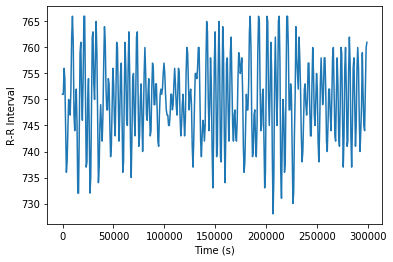

400


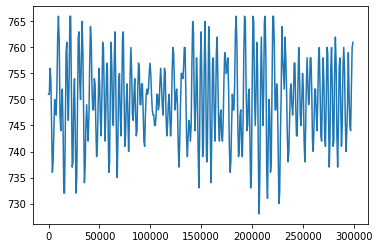

10.0
29918
29919


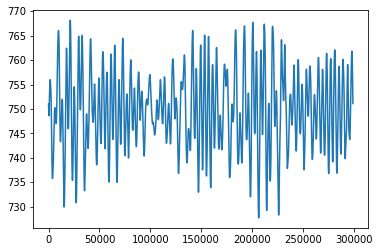

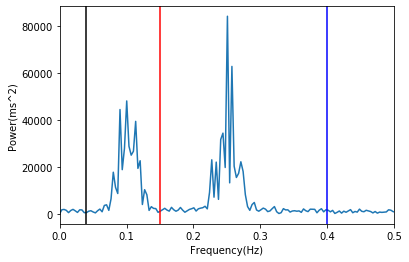

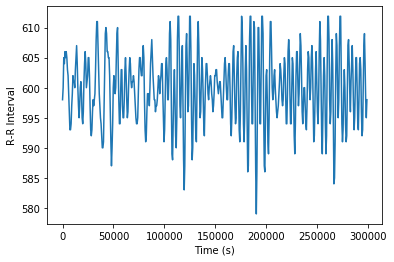

The SDNN is 5.835927760400806
The RMSSD is 4.578253324061714
The PNN50 is 0.0 %
1.0
298770
298770
The absolute power of the Low Frequency band is 9498.493065937595
New formula being used
The absolute power of the High Frequency band is 14616.58515931832
The LF/HF is 0.6498435142275448


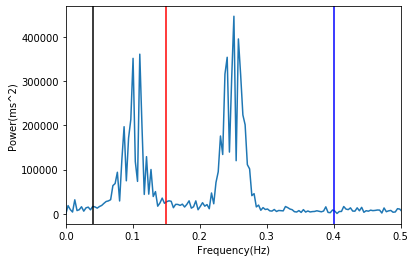

In [31]:
%run "4.0-HRV_Extraction_Function.ipynb"

In [4]:
root = 'G:\My Drive\Molecool\Databases\Database1'
#root = 'G:\.shortcut-targets-by-id\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\Molecool\Databases\Database1'

### Function definitions

In [5]:
def _check_valid(path):
    """Checks if the file is valid by checking the error flag in its metadata file"""
    with open(path + '/PeakMeta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return not (metaData['Error Flag'])

In [6]:
def _save_parameters(para, path):
    """Save parameters in new json file with snippets"""
    with open((path + '/Parameters.json'), "w") as outfile:
        json.dump(para, outfile)
        outfile.close()

In [20]:
def _hrv_analysis(peaks):
    """Function takes a filepath, and extracts R-R interval values + HRV parameters in 
    frequency and time domains using functions from 4.0"""
    
    df = pd.read_feather(peaks + '\\PEAKS.ftr')
    print(type(df))
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    #df_HRV = RR_calculator(df)
    df_HRVt = _hrvreading(df)
    plt.title('HRV values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    plt.subplot(1,2,2)
    df_HRVf = _fft(_timeaxis(df_HRVt, 1), 1)
    plt.title('PSD for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    para = {}
    para['SDNN'] =  SDNN_calculator(df_HRVt) #Calculating the SDNN parameter
    para['RMSSD'] = RMSSD_calculator(df_HRVt) #Calculating the RMSSD parameter
    para['PNN50'] = PNN50_calculator(df_HRVt) #Calculating the PNN50 parameters

    para['LF'], para['HF'], para['LFHF'] = _LFHF(df_HRVf) #Calculating the frequency parameters
    return para

## Initial Testing on selected snippets

In [5]:
### Some good snippets... ###
patients = []
snippets = []
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0288\\holter\\Snippet000')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0288\\holter\\Snippet001')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\Databases\Database1\S0288\holter\Snippet002')

snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet000')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet001')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet002')

snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet000')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet001')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet002')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet003')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet004')

In [154]:
#for peaks in snippets:
   # _hrv_analysis(peaks)

## Initial Testing on updated Peak detection algorithm




  0%|                                                                                           | 0/57 [00:00<?, ?it/s]

In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


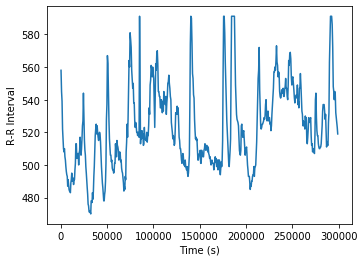

1000.0
299
299
The SDNN is 25.02901821277928
The RMSSD is 9.043217553616687
The PNN50 is 0.17482517482517482 %
The absolute power of the Low Frequency band is 55.28056771822595
New formula being used
The absolute power of the High Frequency band is 32.45767333288228
The LF/HF is 1.703158669177381



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


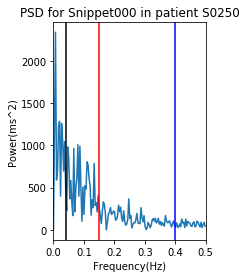

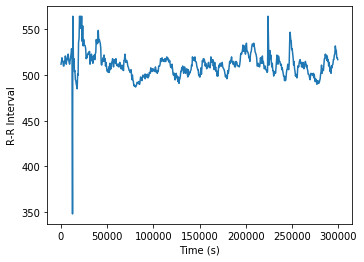

1000.0
299
300
The SDNN is 13.881848477384715
The RMSSD is 13.23108773780194
The PNN50 is 0.3418803418803419 %
The absolute power of the Low Frequency band is 25.865847583557645
New formula being used
The absolute power of the High Frequency band is 24.27942678032316
The LF/HF is 1.0653401259258795



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


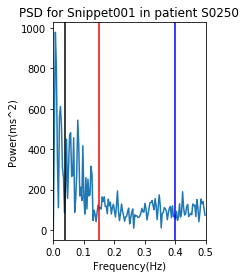

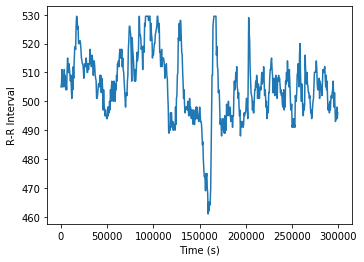




  4%|██▉                                                                                | 2/57 [00:02<01:06,  1.22s/it]

1000.0
299
300
The SDNN is 11.7896089303576
The RMSSD is 4.168404535556179
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 24.91550108646302
New formula being used
The absolute power of the High Frequency band is 10.429250952755456
The LF/HF is 2.389001971410059



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


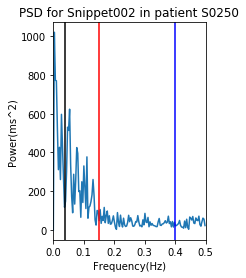

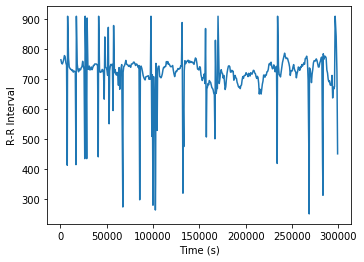




  7%|█████▊                                                                             | 4/57 [00:03<00:51,  1.03it/s]

1000.0
299
299
The SDNN is 91.80190239921963
The RMSSD is 118.34259524857582
The PNN50 is 7.398568019093078 %
The absolute power of the Low Frequency band is 145.60207440398776
New formula being used
The absolute power of the High Frequency band is 300.15116745386285
The LF/HF is 0.4850958123505173



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


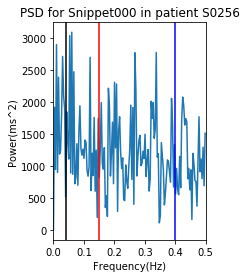

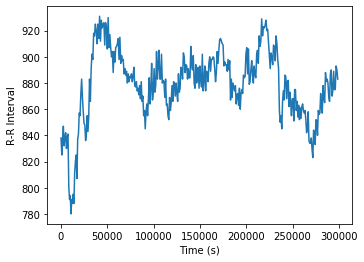

1000.0
298
299
The SDNN is 27.220583014727694
The RMSSD is 12.24396610099656
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 30.239954215155112
New formula being used
The absolute power of the High Frequency band is 28.98935964430389
The LF/HF is 1.0431397790843218



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


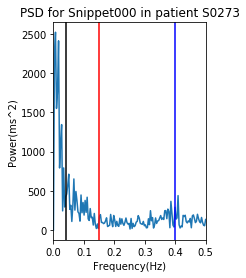

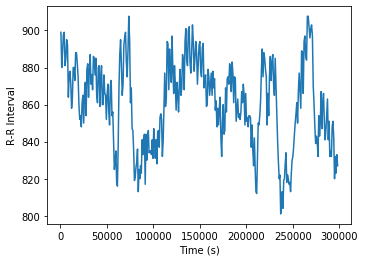

1000.0
298
298
The SDNN is 23.195973925944376
The RMSSD is 12.825913519876815
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 35.50108016215079
New formula being used
The absolute power of the High Frequency band is 38.59255164614981
The LF/HF is 0.9198946078418363



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


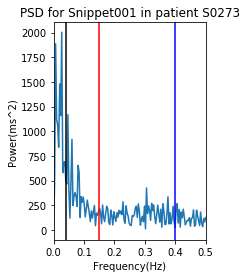

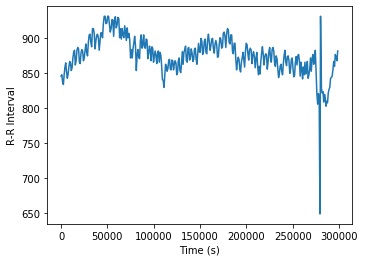

1000.0
298
299
The SDNN is 27.278761807869728
The RMSSD is 22.353369970443502
The PNN50 is 0.29239766081871343 %
The absolute power of the Low Frequency band is 32.16586003682863
New formula being used
The absolute power of the High Frequency band is 57.21769063904712
The LF/HF is 0.5621663453658798



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


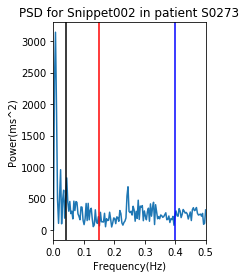

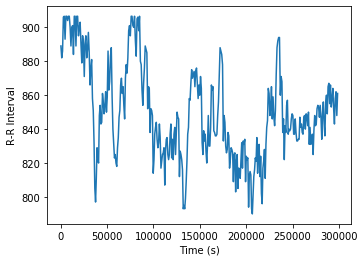

1000.0
298
299
The SDNN is 27.743421738805978
The RMSSD is 12.40682953520507
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 38.330555729893035
New formula being used
The absolute power of the High Frequency band is 36.51166412992737
The LF/HF is 1.0498167268819387



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


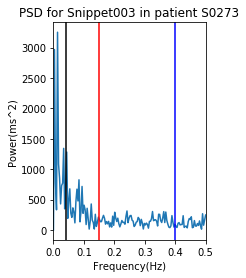

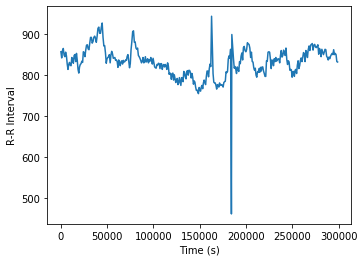




 11%|████████▋                                                                          | 6/57 [00:07<01:06,  1.31s/it]

1000.0
298
299
The SDNN is 37.992892281085595
The RMSSD is 34.926952801585834
The PNN50 is 0.5555555555555556 %
The absolute power of the Low Frequency band is 44.443419173001466
New formula being used
The absolute power of the High Frequency band is 93.0542812675826
The LF/HF is 0.47760746273674415



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


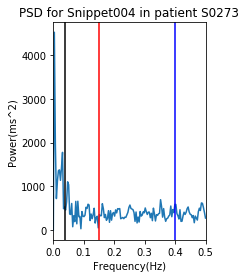

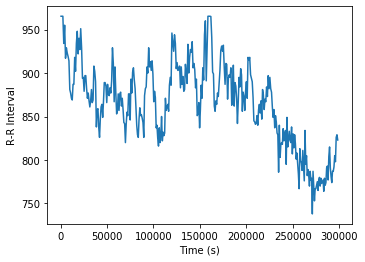

1000.0
298
299
The SDNN is 48.12864408548964
The RMSSD is 20.52664010163521
The PNN50 is 1.4450867052023122 %
The absolute power of the Low Frequency band is 68.21852019247896
New formula being used
The absolute power of the High Frequency band is 52.87393269374454
The LF/HF is 1.29021082255434



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


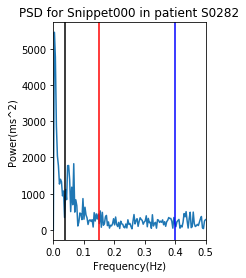

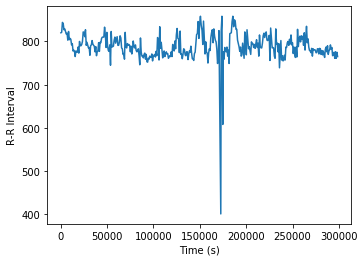




 12%|██████████▏                                                                        | 7/57 [00:09<01:16,  1.54s/it]

1000.0
298
299
The SDNN is 35.075956093559526
The RMSSD is 36.193015927908824
The PNN50 is 3.684210526315789 %
The absolute power of the Low Frequency band is 69.46496949606754
New formula being used
The absolute power of the High Frequency band is 116.00090545409421
The LF/HF is 0.5988312696710576



In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


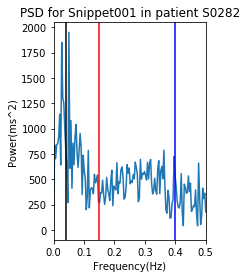

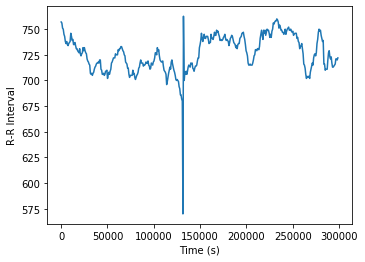

1000.0
298
299
The SDNN is 17.865354005308383
The RMSSD is 11.87182799030617
The PNN50 is 0.24271844660194172 %
The absolute power of the Low Frequency band is 22.966945656418595
New formula being used
The absolute power of the High Frequency band is 24.161741475555644
The LF/HF is 0.9505500950605807



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


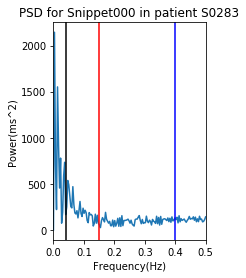

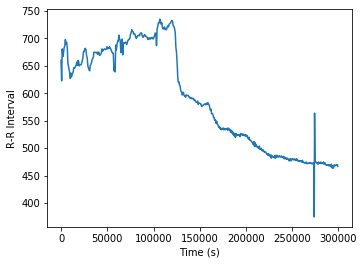

1000.0
299
300
The SDNN is 91.13374669277391
The RMSSD is 11.905336792626796
The PNN50 is 0.38314176245210724 %
The absolute power of the Low Frequency band is 52.04173430298121
New formula being used
The absolute power of the High Frequency band is 31.757404922969545
The LF/HF is 1.6387275480856556



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


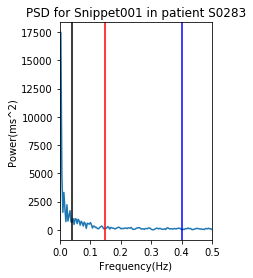

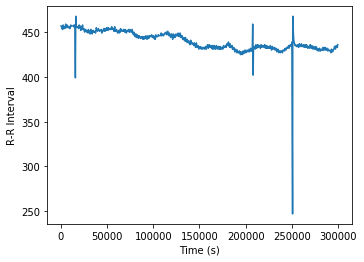

1000.0
299
300
The SDNN is 13.139604765254063
The RMSSD is 11.154859054379115
The PNN50 is 0.2936857562408223 %
The absolute power of the Low Frequency band is 13.514669896400083
New formula being used
The absolute power of the High Frequency band is 32.042551262987125
The LF/HF is 0.4217725918725797



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


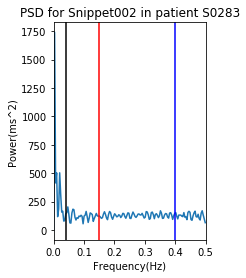

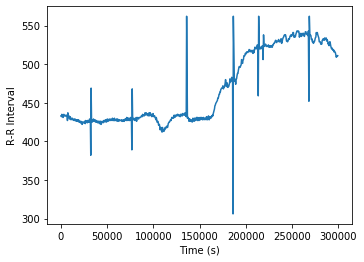




 14%|███████████▋                                                                       | 8/57 [00:15<02:16,  2.79s/it]

1000.0
299
300
The SDNN is 46.18600888200422
The RMSSD is 17.400620905894773
The PNN50 is 0.9287925696594427 %
The absolute power of the Low Frequency band is 17.318190294089398
New formula being used
The absolute power of the High Frequency band is 26.802166294229743
The LF/HF is 0.6461489009497655



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


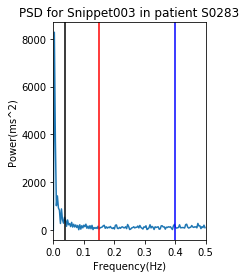

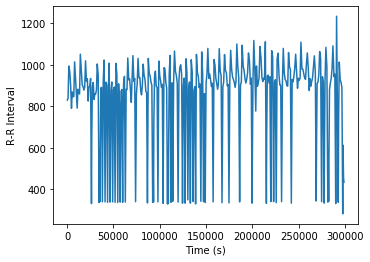

1000.0
298
299
The SDNN is 234.27583734977958
The RMSSD is 278.24194216253306
The PNN50 is 37.735849056603776 %
The absolute power of the Low Frequency band is 342.85203993296074
New formula being used
The absolute power of the High Frequency band is 962.8087004310263
The LF/HF is 0.3560957018559077



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


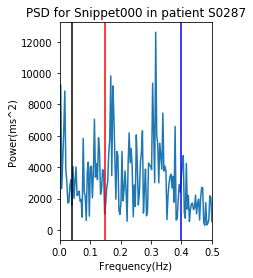

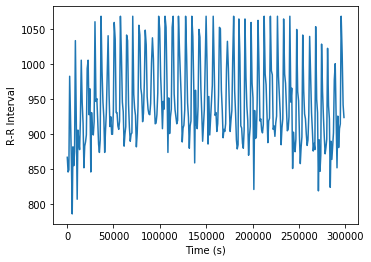

1000.0
298
299
The SDNN is 60.84571274100821
The RMSSD is 67.06467740178387
The PNN50 is 17.981072555205046 %
The absolute power of the Low Frequency band is 91.73349916262191
New formula being used
The absolute power of the High Frequency band is 153.34953670009958
The LF/HF is 0.5981987369288371



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


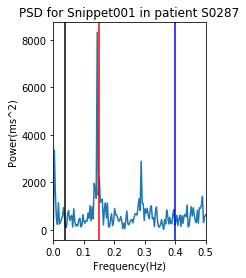

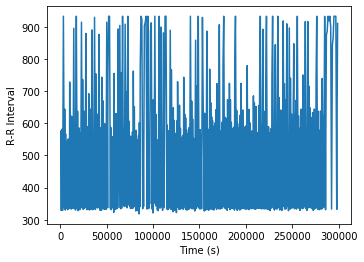




 16%|█████████████                                                                      | 9/57 [00:19<02:29,  3.12s/it]

1000.0
299
299
The SDNN is 195.90018762555073
The RMSSD is 317.2277604803925
The PNN50 is 53.16901408450704 %
The absolute power of the Low Frequency band is 178.18216343346526
New formula being used
The absolute power of the High Frequency band is 434.2681954961158
The LF/HF is 0.4103044277279084



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


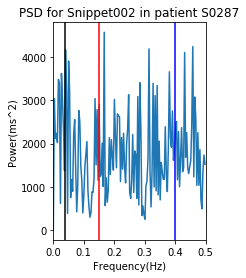

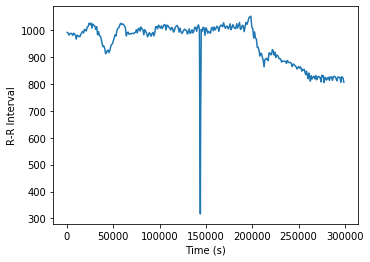

1000.0
298
299
The SDNN is 81.82833351321813
The RMSSD is 48.58474913078451
The PNN50 is 0.6309148264984227 %
The absolute power of the Low Frequency band is 110.75159670461065
New formula being used
The absolute power of the High Frequency band is 180.46093857312613
The LF/HF is 0.6137150653227488



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


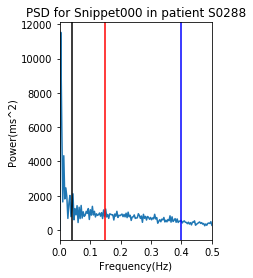

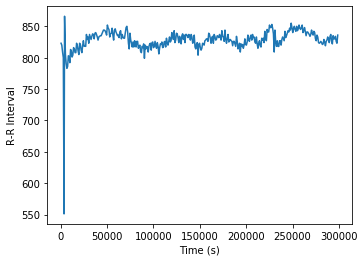

1000.0
298
299
The SDNN is 18.765340446323872
The RMSSD is 22.94445037971607
The PNN50 is 0.2770083102493075 %
The absolute power of the Low Frequency band is 23.644572692467616
New formula being used
The absolute power of the High Frequency band is 57.91068924127258
The LF/HF is 0.40829375374825067



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


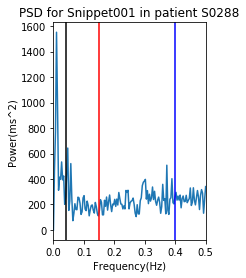

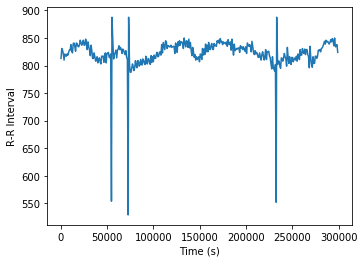




 18%|██████████████▍                                                                   | 10/57 [00:22<02:29,  3.18s/it]

1000.0
299
299
The SDNN is 29.40239482795893
The RMSSD is 41.17790600970195
The PNN50 is 0.8241758241758242 %
The absolute power of the Low Frequency band is 32.73464707396464
New formula being used
The absolute power of the High Frequency band is 92.1369722229788
The LF/HF is 0.3552824266326463



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


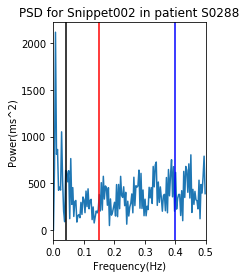

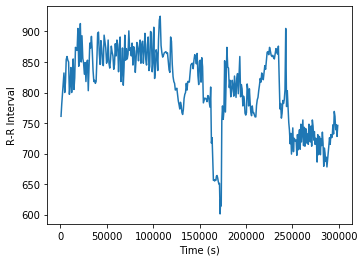

1000.0
298
299
The SDNN is 64.6895750963148
The RMSSD is 28.3183195779636
The PNN50 is 2.6881720430107525 %
The absolute power of the Low Frequency band is 64.33091892539227
New formula being used
The absolute power of the High Frequency band is 72.16778022440434
The LF/HF is 0.8914077546150997



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


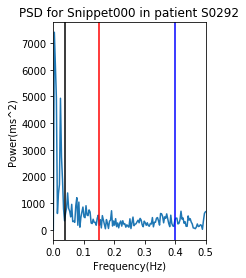

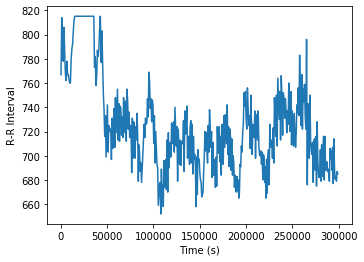




 19%|███████████████▊                                                                  | 11/57 [00:24<02:10,  2.84s/it]

1000.0
298
299
The SDNN is 38.00181668744337
The RMSSD is 24.336258190553547
The PNN50 is 1.6990291262135921 %
The absolute power of the Low Frequency band is 43.475056889345154
New formula being used
The absolute power of the High Frequency band is 36.46589562717229
The LF/HF is 1.1922114112823283



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


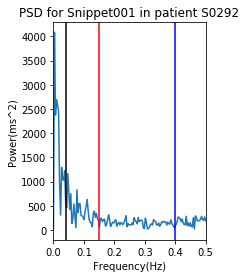

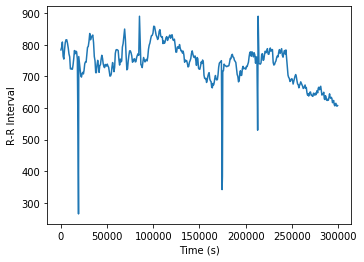

1000.0
299
300
The SDNN is 68.33384090893306
The RMSSD is 48.62419762429221
The PNN50 is 0.9803921568627451 %
The absolute power of the Low Frequency band is 99.27919191202662
New formula being used
The absolute power of the High Frequency band is 165.53829139479402
The LF/HF is 0.5997355117992286



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


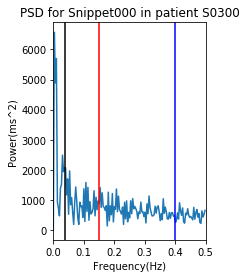

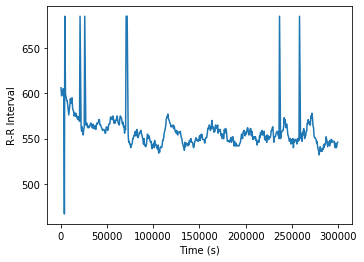

1000.0
299
299
The SDNN is 19.39661177407499
The RMSSD is 21.397699258489432
The PNN50 is 1.1278195488721803 %
The absolute power of the Low Frequency band is 24.642483636465364
New formula being used
The absolute power of the High Frequency band is 47.49564837774823
The LF/HF is 0.5188366614237105



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


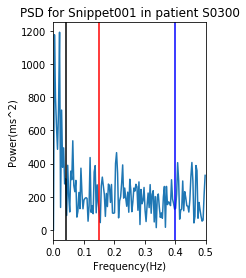

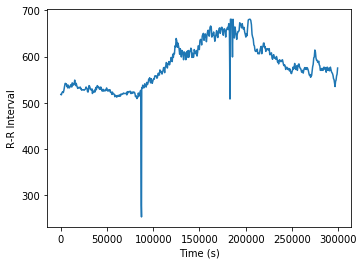




 23%|██████████████████▋                                                               | 13/57 [00:28<01:55,  2.63s/it]

1000.0
299
300
The SDNN is 50.81578531701373
The RMSSD is 21.097869336022534
The PNN50 is 0.576923076923077 %
The absolute power of the Low Frequency band is 37.74969832255621
New formula being used
The absolute power of the High Frequency band is 70.49174561566636
The LF/HF is 0.5355194142641089



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


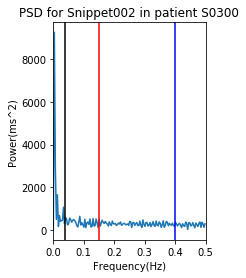

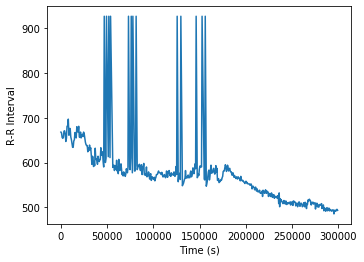

1000.0
299
299
The SDNN is 73.4363789629946
The RMSSD is 78.00941280753179
The PNN50 is 2.5440313111545985 %
The absolute power of the Low Frequency band is 88.43146431533172
New formula being used
The absolute power of the High Frequency band is 127.50733990195019
The LF/HF is 0.6935401866538288



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


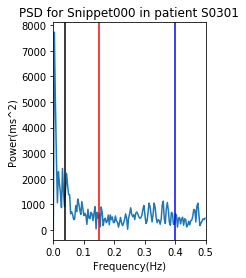

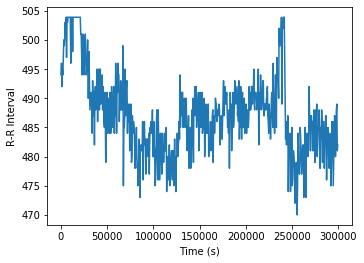

1000.0
299
300
The SDNN is 6.896234436232958
The RMSSD is 4.614098218166981
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 6.803971134107335
New formula being used
The absolute power of the High Frequency band is 7.3080129878080875
The LF/HF is 0.9310288782270033



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


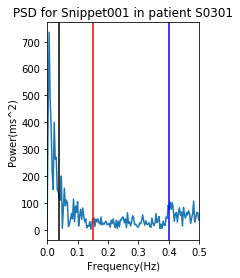

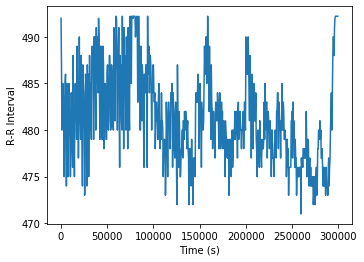




 25%|████████████████████▏                                                             | 14/57 [00:32<02:05,  2.91s/it]

1000.0
299
300
The SDNN is 4.854866559788886
The RMSSD is 4.074696274806969
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 7.070830992187925
New formula being used
The absolute power of the High Frequency band is 5.235450930402447
The LF/HF is 1.350567713494813



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


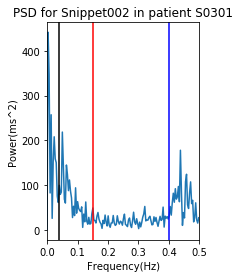

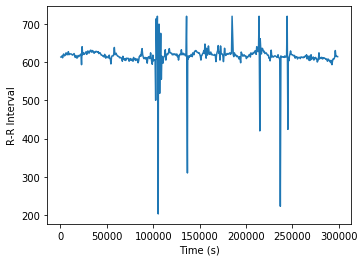




 26%|█████████████████████▌                                                            | 15/57 [00:33<01:41,  2.41s/it]

1000.0
298
299
The SDNN is 37.41864427932597
The RMSSD is 54.74530716462967
The PNN50 is 3.0927835051546393 %
The absolute power of the Low Frequency band is 46.167383916813804
New formula being used
The absolute power of the High Frequency band is 106.12606324876407
The LF/HF is 0.4350239941398322



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


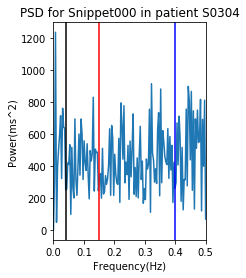

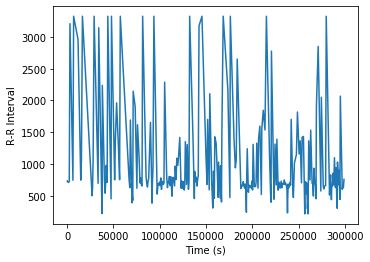




 28%|███████████████████████                                                           | 16/57 [00:34<01:21,  1.98s/it]

1000.0
299
299
The SDNN is 742.1244780029651
The RMSSD is 1026.209898953951
The PNN50 is 45.09090909090909 %
The absolute power of the Low Frequency band is 1210.9389142857374
New formula being used
The absolute power of the High Frequency band is 2779.7195862213002
The LF/HF is 0.4356334791063819



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


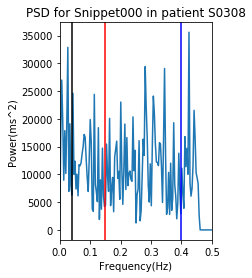

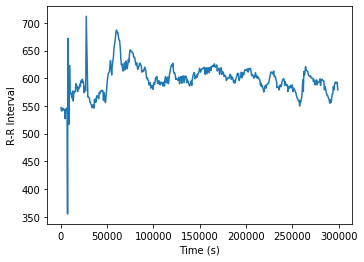

1000.0
299
299
The SDNN is 27.151182793073097
The RMSSD is 21.050265119219144
The PNN50 is 0.6 %
The absolute power of the Low Frequency band is 33.702531018185624
New formula being used
The absolute power of the High Frequency band is 32.51357596943537
The LF/HF is 1.036567957024104



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


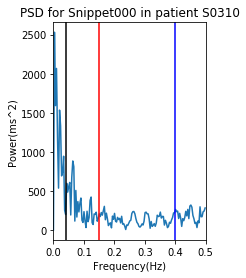

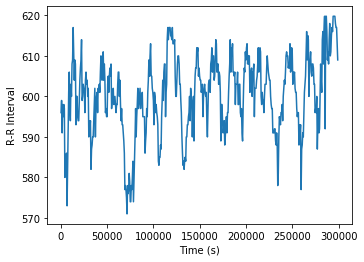

1000.0
298
299
The SDNN is 9.50791800854748
The RMSSD is 5.060809666345977
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 19.414079713990443
New formula being used
The absolute power of the High Frequency band is 12.288423480810476
The LF/HF is 1.5798674048227055



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


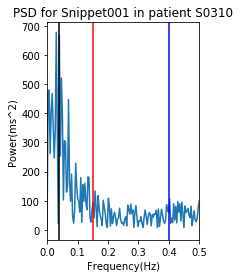

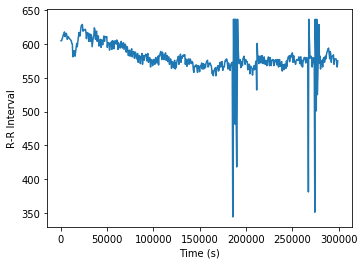

1000.0
298
299
The SDNN is 26.94648143758635
The RMSSD is 32.15109842219256
The PNN50 is 1.9417475728155338 %
The absolute power of the Low Frequency band is 26.669241339043964
New formula being used
The absolute power of the High Frequency band is 65.24614393251784
The LF/HF is 0.4087481609124238



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


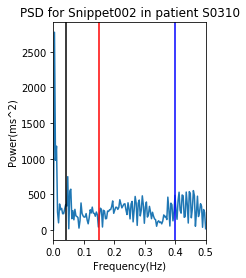

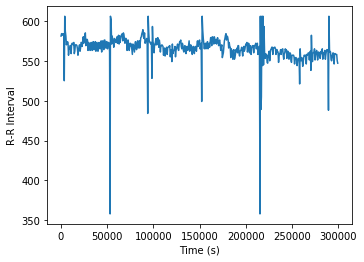

1000.0
299
300
The SDNN is 18.094545200947884
The RMSSD is 25.78113986128172
The PNN50 is 1.6981132075471699 %
The absolute power of the Low Frequency band is 21.963677000977125
New formula being used
The absolute power of the High Frequency band is 41.90163845099886
The LF/HF is 0.5241722713698216



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


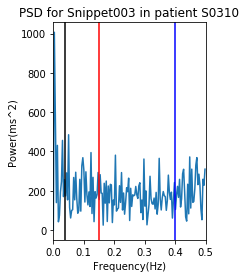

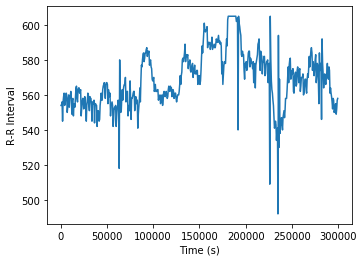




 30%|████████████████████████▍                                                         | 17/57 [00:40<02:08,  3.21s/it]

1000.0
299
299
The SDNN is 15.79153248535903
The RMSSD is 11.202530405501417
The PNN50 is 0.7604562737642585 %
The absolute power of the Low Frequency band is 17.330771450273936
New formula being used
The absolute power of the High Frequency band is 18.46814071736897
The LF/HF is 0.9384145223657865



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


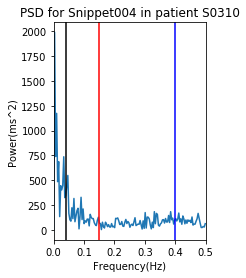

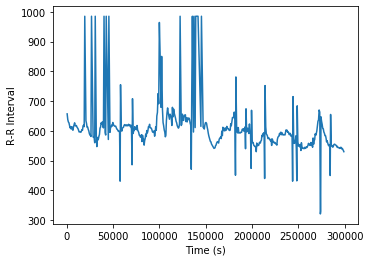




 32%|█████████████████████████▉                                                        | 18/57 [00:41<01:41,  2.61s/it]

1000.0
299
299
The SDNN is 80.86968421873547
The RMSSD is 98.16603891239156
The PNN50 is 5.371900826446281 %
The absolute power of the Low Frequency band is 127.19552348057992
New formula being used
The absolute power of the High Frequency band is 172.80153419795565
The LF/HF is 0.7360786700821128



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


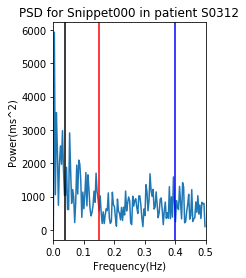

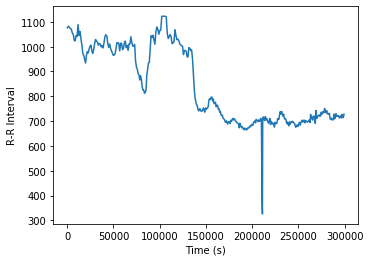

1000.0
299
300
The SDNN is 149.14049517866772
The RMSSD is 30.74886686958268
The PNN50 is 1.639344262295082 %
The absolute power of the Low Frequency band is 120.31442510044049
New formula being used
The absolute power of the High Frequency band is 122.02344923385556
The LF/HF is 0.9859942974555672



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


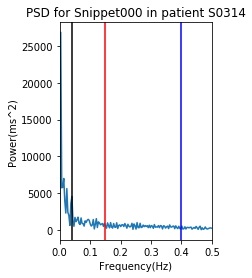

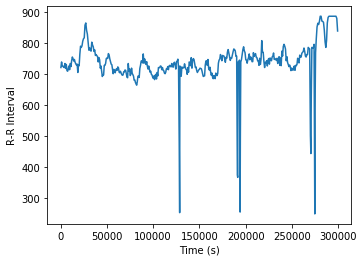




 33%|███████████████████████████▎                                                      | 19/57 [00:43<01:33,  2.47s/it]

1000.0
299
299
The SDNN is 71.73646694160556
The RMSSD is 63.88510979196017
The PNN50 is 2.4630541871921183 %
The absolute power of the Low Frequency band is 116.8957008135844
New formula being used
The absolute power of the High Frequency band is 234.34530590754633
The LF/HF is 0.49881818780574155



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


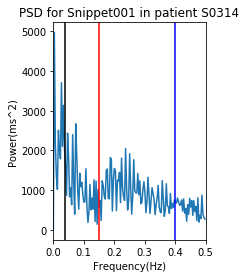

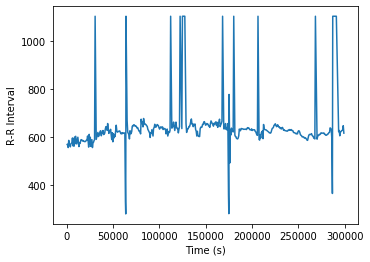




 35%|████████████████████████████▊                                                     | 20/57 [00:45<01:15,  2.04s/it]

1000.0
299
299
The SDNN is 86.79663808029734
The RMSSD is 114.37368235646946
The PNN50 is 3.2537960954446854 %
The absolute power of the Low Frequency band is 126.26600686787361
New formula being used
The absolute power of the High Frequency band is 268.22982976183204
The LF/HF is 0.4707381240184522



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


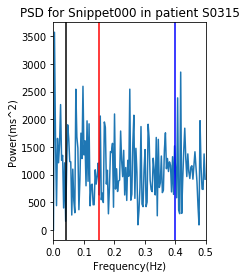

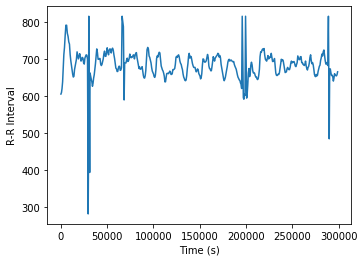

1000.0
298
299
The SDNN is 42.95457540543836
The RMSSD is 49.57070518174169
The PNN50 is 2.064220183486239 %
The absolute power of the Low Frequency band is 81.21024845218267
New formula being used
The absolute power of the High Frequency band is 107.3263203287306
The LF/HF is 0.7566666611083207



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


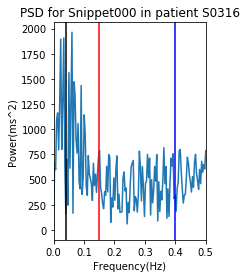

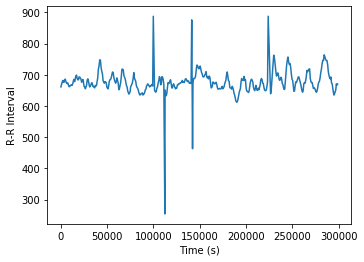

1000.0
298
299
The SDNN is 40.324029071696195
The RMSSD is 41.57654458423444
The PNN50 is 1.1363636363636365 %
The absolute power of the Low Frequency band is 85.63580506507392
New formula being used
The absolute power of the High Frequency band is 114.25295049647289
The LF/HF is 0.7495281714209874



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


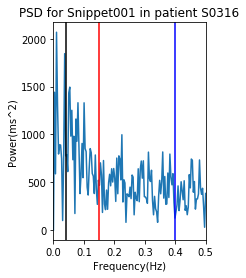

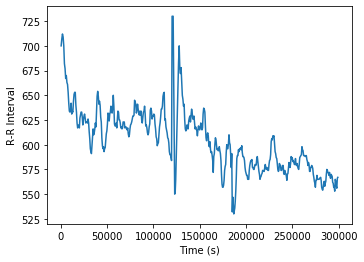

1000.0
299
299
The SDNN is 31.764599353878463
The RMSSD is 12.51718142514792
The PNN50 is 0.20242914979757085 %
The absolute power of the Low Frequency band is 56.05646598536053
New formula being used
The absolute power of the High Frequency band is 52.90071630503601
The LF/HF is 1.0596541956469518



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


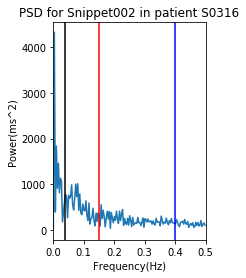

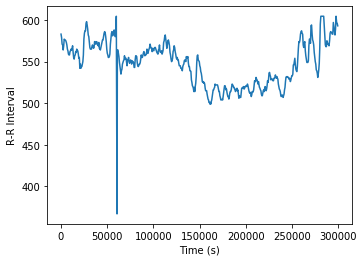




 37%|██████████████████████████████▏                                                   | 21/57 [00:49<01:41,  2.82s/it]

1000.0
299
300
The SDNN is 26.70515196819545
The RMSSD is 13.97639584006949
The PNN50 is 0.18248175182481752 %
The absolute power of the Low Frequency band is 34.01342496715055
New formula being used
The absolute power of the High Frequency band is 30.013724326454533
The LF/HF is 1.1332623901383216



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


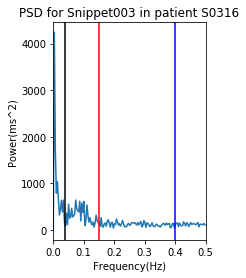

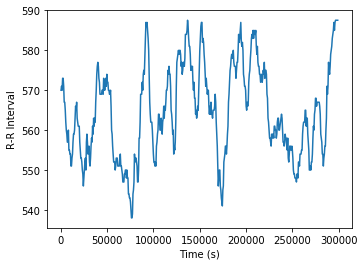

1000.0
298
299
The SDNN is 11.502306062845573
The RMSSD is 2.440654300335555
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 18.421205728769372
New formula being used
The absolute power of the High Frequency band is 7.341147351305594
The LF/HF is 2.5093088106307024



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


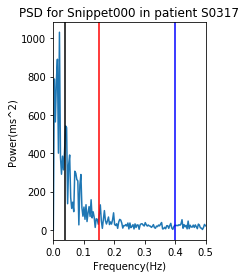

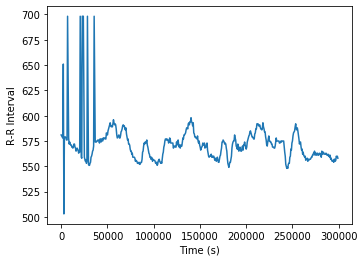

1000.0
299
300
The SDNN is 18.262006750487902
The RMSSD is 20.393905370565633
The PNN50 is 1.3461538461538463 %
The absolute power of the Low Frequency band is 27.877421960635026
New formula being used
The absolute power of the High Frequency band is 42.723590886291994
The LF/HF is 0.6525065281808882



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


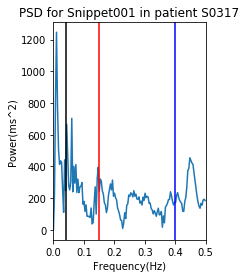

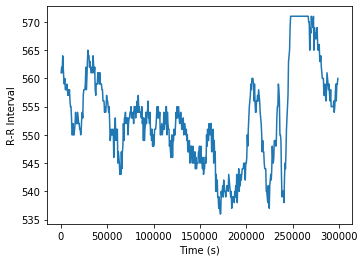

1000.0
298
299
The SDNN is 8.489677452203987
The RMSSD is 1.9977428423698311
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 9.494602685227406
New formula being used
The absolute power of the High Frequency band is 3.190198388192111
The LF/HF is 2.9761793875797196



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


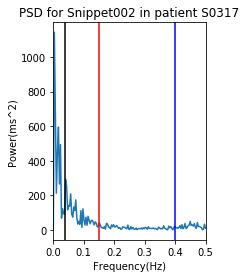

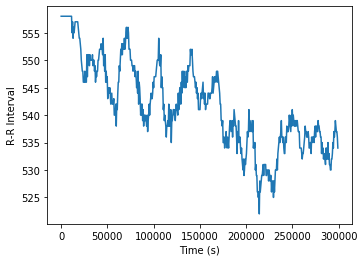




 39%|███████████████████████████████▋                                                  | 22/57 [00:55<02:15,  3.87s/it]

1000.0
299
300
The SDNN is 7.922169716184374
The RMSSD is 1.7967679699390928
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 6.614191631341402
New formula being used
The absolute power of the High Frequency band is 4.509137839073556
The LF/HF is 1.466841748333058



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


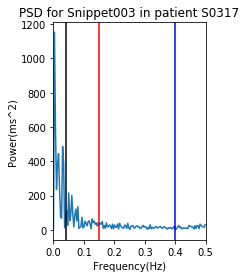

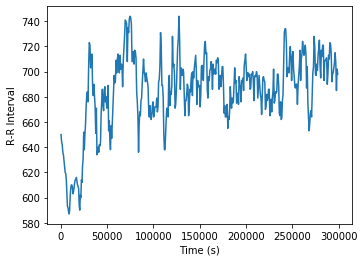

1000.0
298
299
The SDNN is 30.82211533845041
The RMSSD is 12.244832656000463
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 47.52270592582552
New formula being used
The absolute power of the High Frequency band is 38.34043077489538
The LF/HF is 1.2394932702984267



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


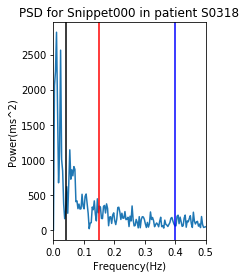

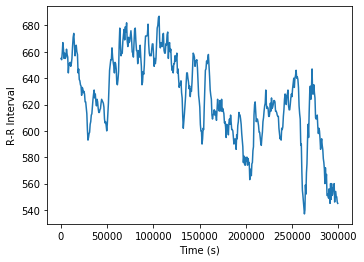

1000.0
299
300
The SDNN is 33.07507387636871
The RMSSD is 6.929405938943588
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 41.79498610112614
New formula being used
The absolute power of the High Frequency band is 26.107927810759005
The LF/HF is 1.6008542081192114



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


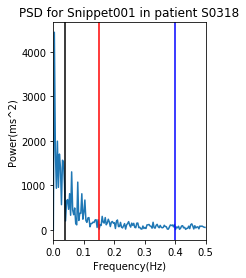

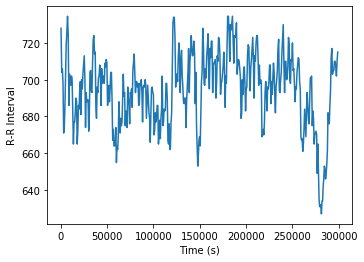




 40%|█████████████████████████████████                                                 | 23/57 [00:59<02:11,  3.88s/it]

1000.0
299
299
The SDNN is 19.94657154041606
The RMSSD is 11.52105896280197
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 35.833680945253356
New formula being used
The absolute power of the High Frequency band is 36.17873921044885
The LF/HF is 0.9904624021531452



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


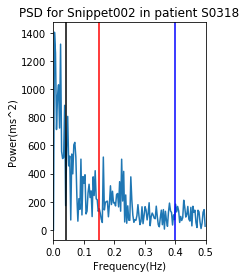

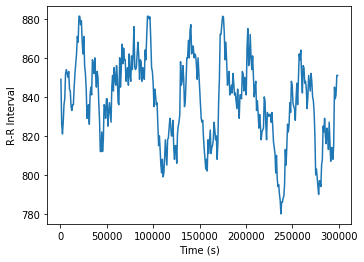

1000.0
298
299
The SDNN is 21.555074308062416
The RMSSD is 8.825346965326654
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 33.10410463780967
New formula being used
The absolute power of the High Frequency band is 22.53039525967745
The LF/HF is 1.4693086497712686



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


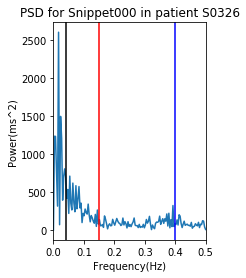

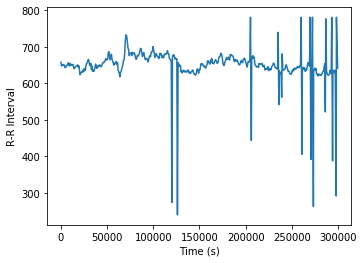

1000.0
299
300
The SDNN is 54.278425153708504
The RMSSD is 71.47392742931879
The PNN50 is 4.121475054229935 %
The absolute power of the Low Frequency band is 71.35941067336807
New formula being used
The absolute power of the High Frequency band is 169.38371877624883
The LF/HF is 0.4212884873996176



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


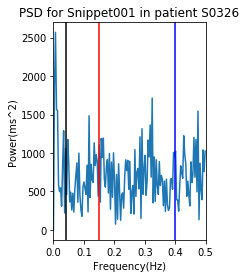

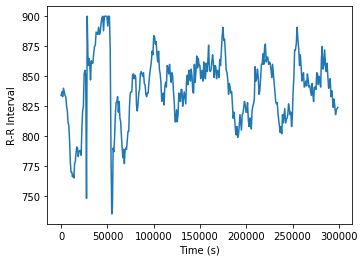




 42%|██████████████████████████████████▌                                               | 24/57 [01:02<01:55,  3.51s/it]

1000.0
298
299
The SDNN is 29.02622133410733
The RMSSD is 14.684736277838683
The PNN50 is 0.2801120448179272 %
The absolute power of the Low Frequency band is 49.68892281493277
New formula being used
The absolute power of the High Frequency band is 39.97101506323261
The LF/HF is 1.2431238670403242



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


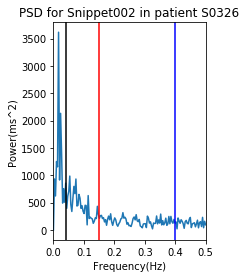

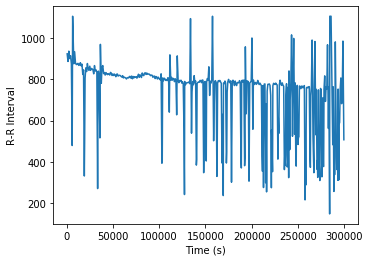

1000.0
299
299
The SDNN is 184.86889681149702
The RMSSD is 211.9390404672266
The PNN50 is 22.48803827751196 %
The absolute power of the Low Frequency band is 275.34799080935153
New formula being used
The absolute power of the High Frequency band is 572.2003378588611
The LF/HF is 0.4812090671593921



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


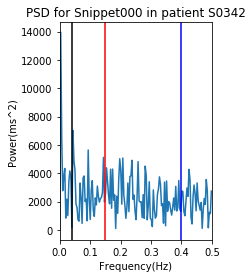

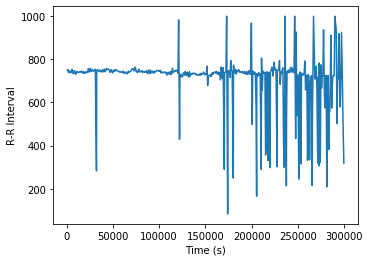




 49%|████████████████████████████████████████▎                                         | 28/57 [01:05<01:17,  2.67s/it]

1000.0
299
299
The SDNN is 135.64645730921222
The RMSSD is 163.43797625668591
The PNN50 is 13.817330210772832 %
The absolute power of the Low Frequency band is 210.07384109997918
New formula being used
The absolute power of the High Frequency band is 473.34646124125624
The LF/HF is 0.44380566519733267



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


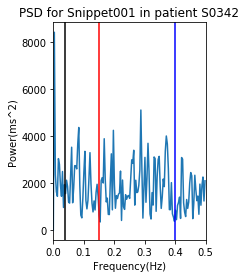

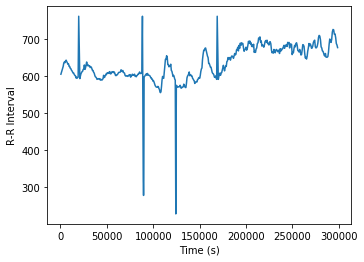




 51%|█████████████████████████████████████████▋                                        | 29/57 [01:06<01:06,  2.38s/it]

1000.0
298
299
The SDNN is 53.55718892602399
The RMSSD is 36.712465390257584
The PNN50 is 1.2711864406779663 %
The absolute power of the Low Frequency band is 81.99318774695816
New formula being used
The absolute power of the High Frequency band is 127.30104904197465
The LF/HF is 0.6440888615138022



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


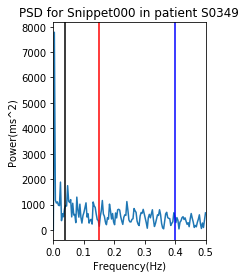

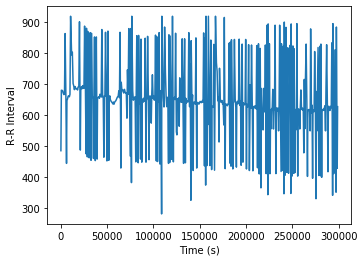

1000.0
298
299
The SDNN is 135.3485915055346
The RMSSD is 229.63876321065825
The PNN50 is 34.05172413793103 %
The absolute power of the Low Frequency band is 76.59280874201964
New formula being used
The absolute power of the High Frequency band is 322.968381275149
The LF/HF is 0.23715265389018786



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


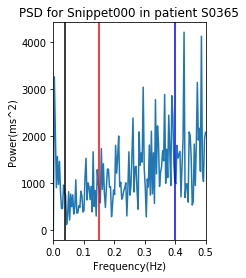

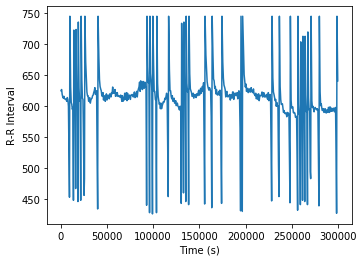

1000.0
299
299
The SDNN is 58.66026218197579
The RMSSD is 88.70096032232065
The PNN50 is 6.5439672801636 %
The absolute power of the Low Frequency band is 42.11560939819973
New formula being used
The absolute power of the High Frequency band is 182.33465185765746
The LF/HF is 0.2309797340720401



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


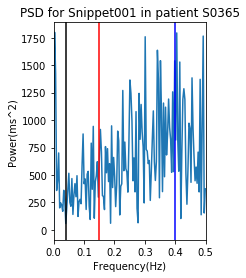

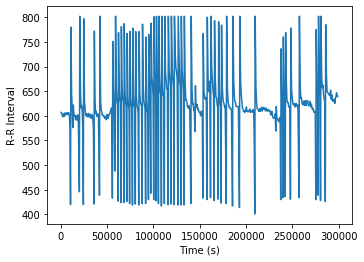

1000.0
299
299
The SDNN is 86.83078431854285
The RMSSD is 138.48181303776383
The PNN50 is 10.58091286307054 %
The absolute power of the Low Frequency band is 41.92215928724993
New formula being used
The absolute power of the High Frequency band is 259.01669116841884
The LF/HF is 0.16185118842395815







 53%|███████████████████████████████████████████▏                                      | 30/57 [01:10<01:16,  2.82s/it]


In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


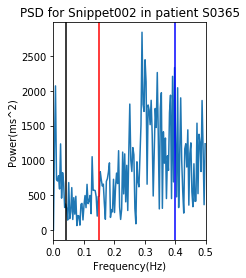

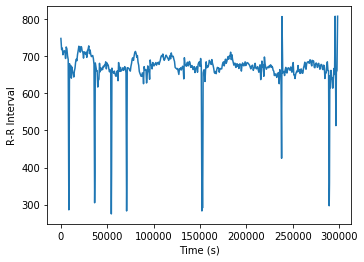

1000.0
298
299
The SDNN is 64.7842682719657
The RMSSD is 64.72356969539362
The PNN50 is 4.434589800443459 %
The absolute power of the Low Frequency band is 128.68523543278712
New formula being used
The absolute power of the High Frequency band is 213.8618377008687
The LF/HF is 0.6017213581264592



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


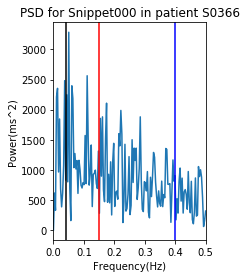

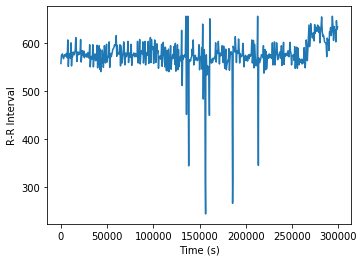




 54%|████████████████████████████████████████████▌                                     | 31/57 [01:13<01:10,  2.70s/it]

1000.0
299
300
The SDNN is 37.82665312646483
The RMSSD is 45.460893304655926
The PNN50 is 2.6871401151631478 %
The absolute power of the Low Frequency band is 53.49336000861194
New formula being used
The absolute power of the High Frequency band is 107.40059413752769
The LF/HF is 0.49807322238937596



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


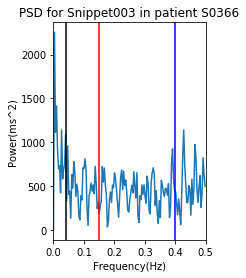

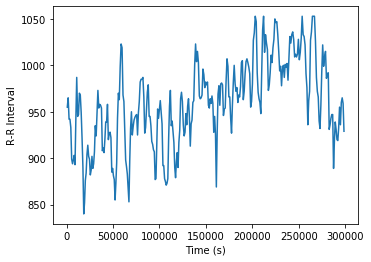

1000.0
298
299
The SDNN is 45.97642700243879
The RMSSD is 21.400007911259486
The PNN50 is 0.641025641025641 %
The absolute power of the Low Frequency band is 93.35332259537678
New formula being used
The absolute power of the High Frequency band is 56.55052909331783
The LF/HF is 1.6507948571326043



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


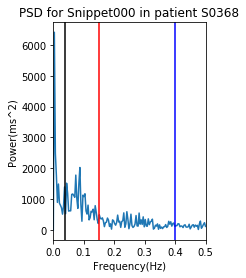

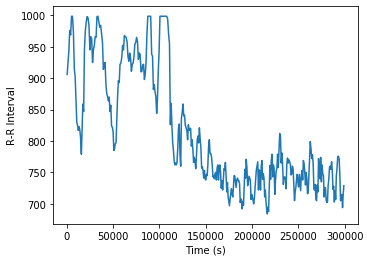

1000.0
298
299
The SDNN is 92.01006567677871
The RMSSD is 21.63563170310326
The PNN50 is 1.0810810810810811 %
The absolute power of the Low Frequency band is 116.5318801888085
New formula being used
The absolute power of the High Frequency band is 57.19037805441375
The LF/HF is 2.0376133915032755



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


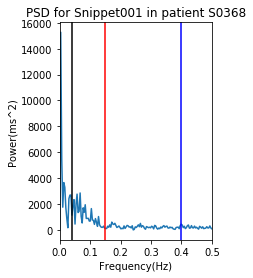

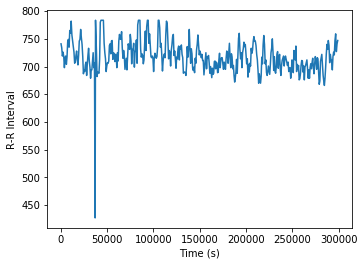




 56%|██████████████████████████████████████████████                                    | 32/57 [01:15<01:05,  2.61s/it]

1000.0
298
299
The SDNN is 28.514595996433197
The RMSSD is 29.085117988346177
The PNN50 is 0.7194244604316548 %
The absolute power of the Low Frequency band is 59.059743630761254
New formula being used
The absolute power of the High Frequency band is 71.40970469306707
The LF/HF is 0.827054864385893



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


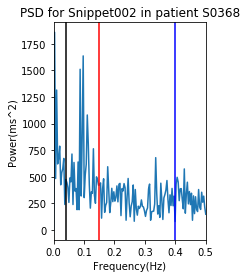

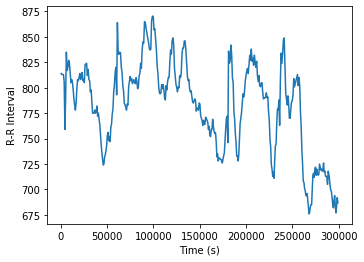

1000.0
298
299
The SDNN is 44.70253580038549
The RMSSD is 11.505692372529323
The PNN50 is 0.5221932114882507 %
The absolute power of the Low Frequency band is 58.336383879294104
New formula being used
The absolute power of the High Frequency band is 34.98516412046691
The LF/HF is 1.6674606321245278



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


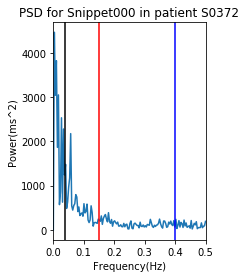

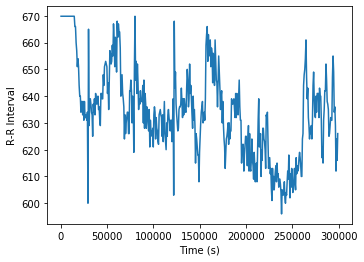

1000.0
299
299
The SDNN is 16.652685975353695
The RMSSD is 8.92448963918021
The PNN50 is 0.423728813559322 %
The absolute power of the Low Frequency band is 23.775646165615058
New formula being used
The absolute power of the High Frequency band is 20.41357488247162
The LF/HF is 1.164697820078066



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


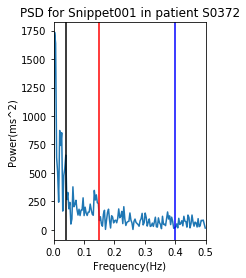

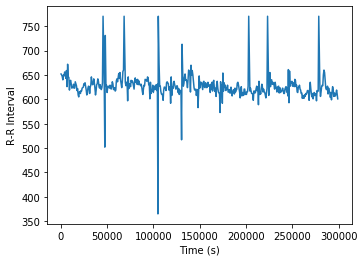




 58%|███████████████████████████████████████████████▍                                  | 33/57 [01:18<01:06,  2.77s/it]

1000.0
298
299
The SDNN is 26.255889506757857
The RMSSD is 37.77779177095261
The PNN50 is 2.9535864978902953 %
The absolute power of the Low Frequency band is 34.07734557898803
New formula being used
The absolute power of the High Frequency band is 72.62472942194246
The LF/HF is 0.46922509522895484



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


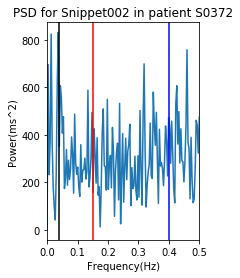

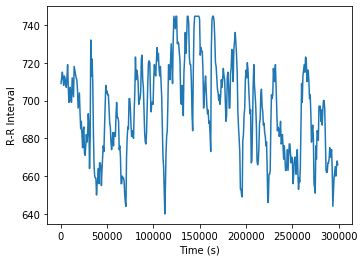

1000.0
299
299
The SDNN is 24.21463545566498
The RMSSD is 10.05121116061217
The PNN50 is 0.46403712296983757 %
The absolute power of the Low Frequency band is 56.26530023342565
New formula being used
The absolute power of the High Frequency band is 33.71315948526348
The LF/HF is 1.6689417750365414



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


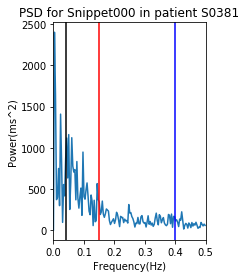

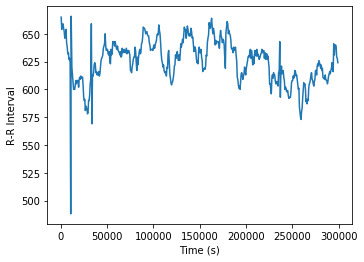

1000.0
299
299
The SDNN is 19.552648460317325
The RMSSD is 13.071335651688283
The PNN50 is 0.20876826722338201 %
The absolute power of the Low Frequency band is 26.988787449885262
New formula being used
The absolute power of the High Frequency band is 26.227496695656093
The LF/HF is 1.0290264359981887



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


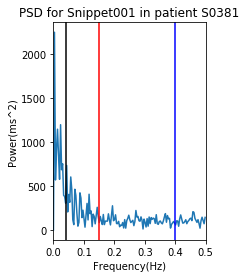

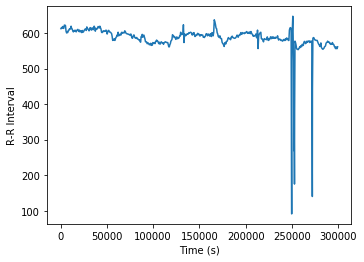




 60%|████████████████████████████████████████████████▉                                 | 34/57 [01:22<01:09,  3.04s/it]

1000.0
299
300
The SDNN is 43.456435069091846
The RMSSD is 43.94018928469699
The PNN50 is 1.364522417153996 %
The absolute power of the Low Frequency band is 69.75394013562205
New formula being used
The absolute power of the High Frequency band is 139.1149160614773
The LF/HF is 0.501412372666038



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


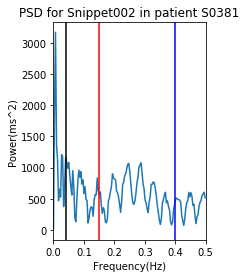

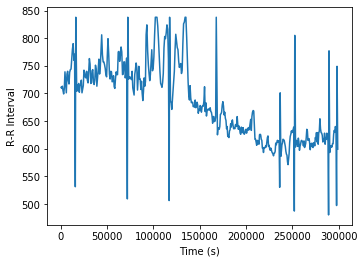




 61%|██████████████████████████████████████████████████▎                               | 35/57 [01:24<00:56,  2.59s/it]

1000.0
299
299
The SDNN is 69.3739389565483
The RMSSD is 52.12469162867304
The PNN50 is 2.0454545454545454 %
The absolute power of the Low Frequency band is 66.13330097072532
New formula being used
The absolute power of the High Frequency band is 87.83408341027695
The LF/HF is 0.7529343781253309



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


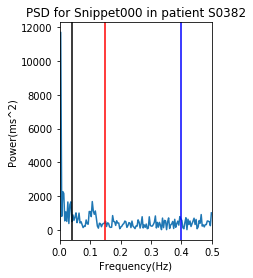

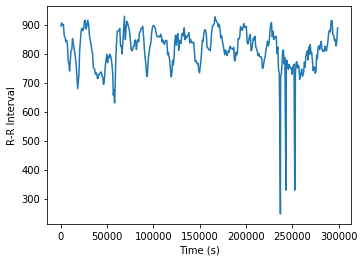

1000.0
298
299
The SDNN is 79.60083034353706
The RMSSD is 56.658536002062554
The PNN50 is 2.9729729729729732 %
The absolute power of the Low Frequency band is 157.92920580333498
New formula being used
The absolute power of the High Frequency band is 191.80814731652163
The LF/HF is 0.8233706858276482



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


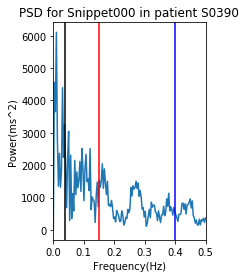

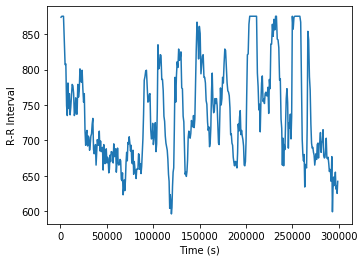

1000.0
298
299
The SDNN is 67.70026805793582
The RMSSD is 26.177648619813503
The PNN50 is 2.696078431372549 %
The absolute power of the Low Frequency band is 154.2342151452368
New formula being used
The absolute power of the High Frequency band is 82.30505661803547
The LF/HF is 1.8739336498000723



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


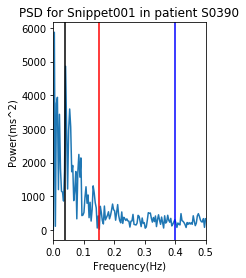

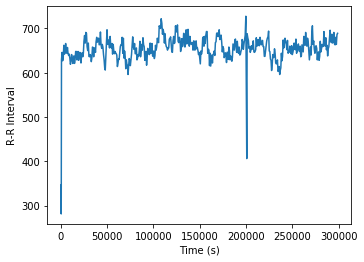




 63%|███████████████████████████████████████████████████▊                              | 36/57 [01:27<01:02,  2.99s/it]

1000.0
298
299
The SDNN is 33.196866634613556
The RMSSD is 30.969922428845276
The PNN50 is 0.43668122270742354 %
The absolute power of the Low Frequency band is 67.79733111024697
New formula being used
The absolute power of the High Frequency band is 105.43843609860352
The LF/HF is 0.6430039520582848



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


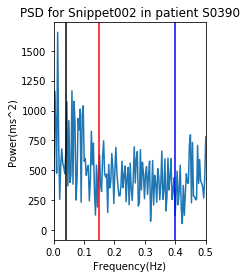

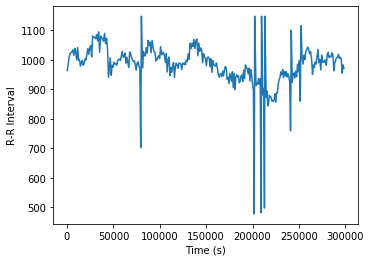

1000.0
298
299
The SDNN is 74.90330061592626
The RMSSD is 96.4010241745337
The PNN50 is 3.618421052631579 %
The absolute power of the Low Frequency band is 71.61028832302739
New formula being used
The absolute power of the High Frequency band is 220.224290952466
The LF/HF is 0.3251697985418149



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


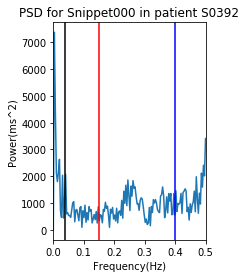

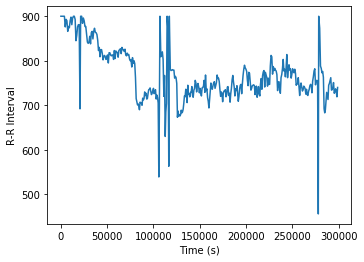

1000.0
298
299
The SDNN is 59.39142997887168
The RMSSD is 46.97349814900881
The PNN50 is 1.7994858611825193 %
The absolute power of the Low Frequency band is 73.2524714772116
New formula being used
The absolute power of the High Frequency band is 123.57310897024881
The LF/HF is 0.5927865057991517



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


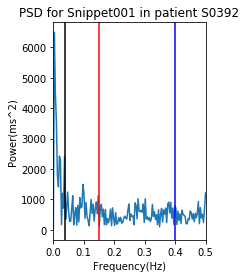

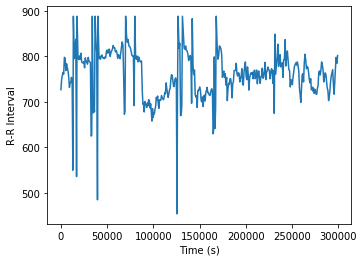




 65%|█████████████████████████████████████████████████████▏                            | 37/57 [01:31<01:01,  3.05s/it]

1000.0
299
299
The SDNN is 54.14448142983436
The RMSSD is 62.12638340216019
The PNN50 is 3.5532994923857872 %
The absolute power of the Low Frequency band is 69.88120050024285
New formula being used
The absolute power of the High Frequency band is 160.27290448975586
The LF/HF is 0.4360138148286284



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


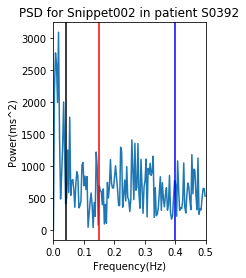

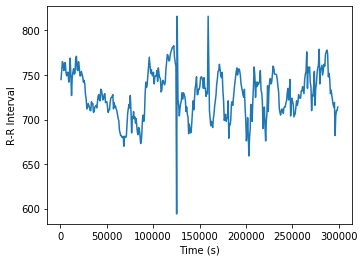

1000.0
299
299
The SDNN is 26.35112426939334
The RMSSD is 19.317732466092956
The PNN50 is 0.4878048780487805 %
The absolute power of the Low Frequency band is 42.981112392816335
New formula being used
The absolute power of the High Frequency band is 43.869973405210644
The LF/HF is 0.9797387382895305



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


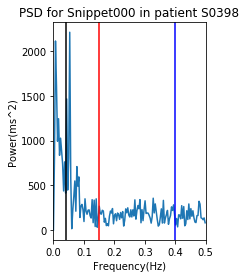

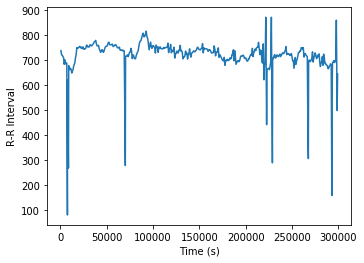




 67%|██████████████████████████████████████████████████████▋                           | 38/57 [01:33<00:53,  2.82s/it]

1000.0
299
299
The SDNN is 75.22345103044604
The RMSSD is 84.77661620270491
The PNN50 is 3.349282296650718 %
The absolute power of the Low Frequency band is 136.472014756097
New formula being used
The absolute power of the High Frequency band is 197.6946182053668
The LF/HF is 0.6903172984422304



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


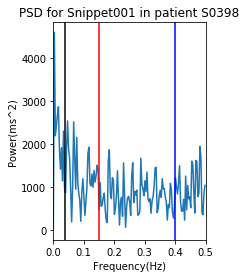

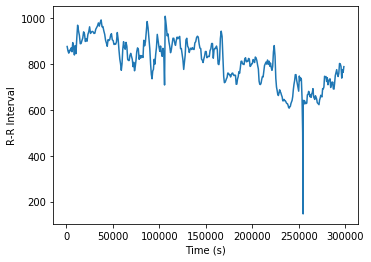

1000.0
298
298
The SDNN is 103.2079364740199
The RMSSD is 44.59577506974541
The PNN50 is 2.949061662198391 %
The absolute power of the Low Frequency band is 123.3015042345018
New formula being used
The absolute power of the High Frequency band is 143.95221513433165
The LF/HF is 0.8565446812988653



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


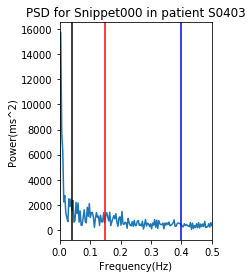

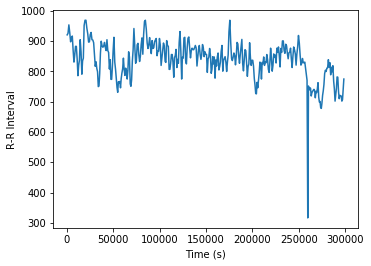

1000.0
298
299
The SDNN is 67.40186045170596
The RMSSD is 44.882269158034326
The PNN50 is 6.128133704735376 %
The absolute power of the Low Frequency band is 116.40104154531952
New formula being used
The absolute power of the High Frequency band is 154.1287920746049
The LF/HF is 0.75521932001502



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


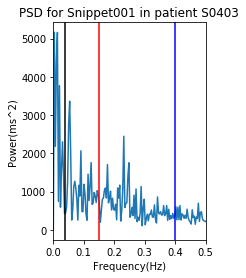

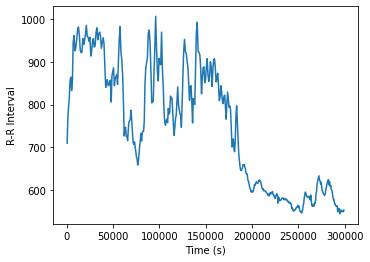

1000.0
299
299
The SDNN is 140.7079401808938
The RMSSD is 24.22169713907881
The PNN50 is 4.358353510895883 %
The absolute power of the Low Frequency band is 112.01427497401849
New formula being used
The absolute power of the High Frequency band is 85.92878776952517
The LF/HF is 1.3035709903700583



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


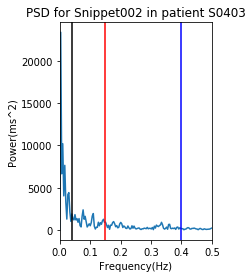

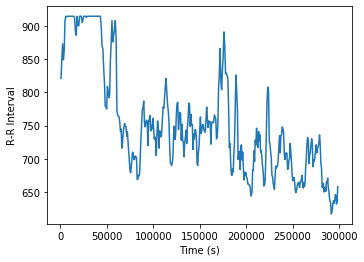

1000.0
298
299
The SDNN is 78.53648034177509
The RMSSD is 19.001023954296734
The PNN50 is 0.7518796992481203 %
The absolute power of the Low Frequency band is 101.20057182842113
New formula being used
The absolute power of the High Frequency band is 65.14914273524917
The LF/HF is 1.5533676665505256



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


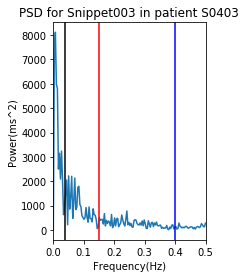

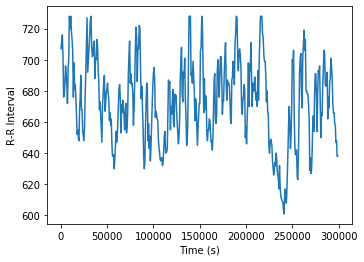




 68%|████████████████████████████████████████████████████████                          | 39/57 [01:39<01:06,  3.69s/it]

1000.0
299
299
The SDNN is 26.86133260093731
The RMSSD is 13.621915913419388
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 56.182657982795554
New formula being used
The absolute power of the High Frequency band is 49.82099602361034
The LF/HF is 1.1276903809022685



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


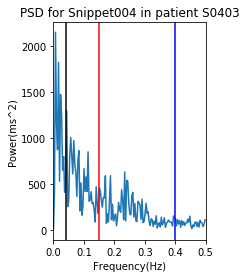

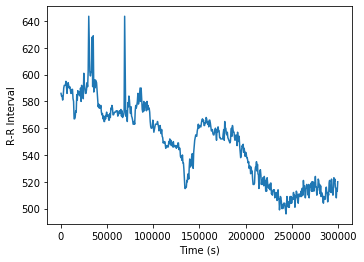

1000.0
299
299
The SDNN is 28.945244580598814
The RMSSD is 7.393281654558097
The PNN50 is 0.1834862385321101 %
The absolute power of the Low Frequency band is 19.89580547420009
New formula being used
The absolute power of the High Frequency band is 20.4941584996302
The LF/HF is 0.9708037280261638



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


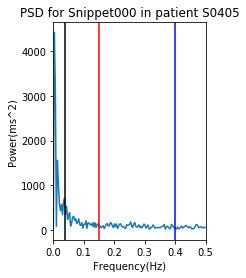

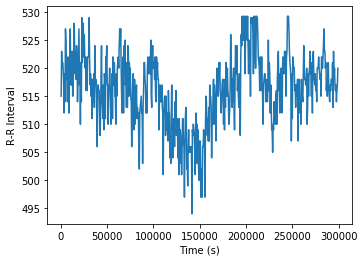

1000.0
299
299
The SDNN is 6.399694336807676
The RMSSD is 5.269186082562686
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 6.6283632394946315
New formula being used
The absolute power of the High Frequency band is 13.946736330798158
The LF/HF is 0.47526267667779853



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


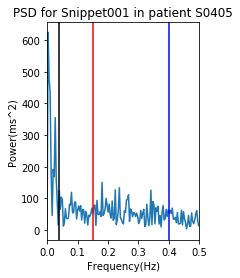

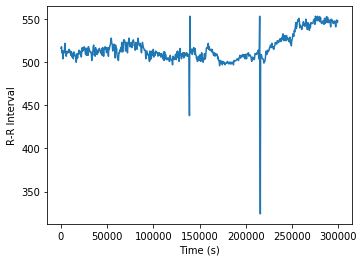

1000.0
299
300
The SDNN is 16.83673921511706
The RMSSD is 14.329690519360952
The PNN50 is 0.3448275862068966 %
The absolute power of the Low Frequency band is 12.607632516352066
New formula being used
The absolute power of the High Frequency band is 23.284058069629662
The LF/HF is 0.5414705838067253





 70%|█████████████████████████████████████████████████████████▌                        | 40/57 [01:44<01:09,  4.09s/it]

In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


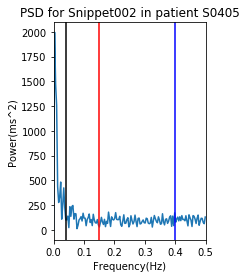

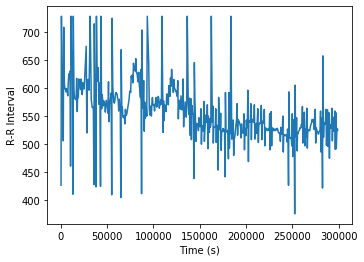




 72%|██████████████████████████████████████████████████████████▉                       | 41/57 [01:45<00:52,  3.30s/it]

1000.0
299
299
The SDNN is 51.1873406633358
The RMSSD is 66.47218915510612
The PNN50 is 7.116104868913857 %
The absolute power of the Low Frequency band is 46.15565049324902
New formula being used
The absolute power of the High Frequency band is 86.5047908835654
The LF/HF is 0.5335617833626587



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


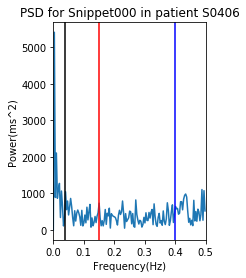

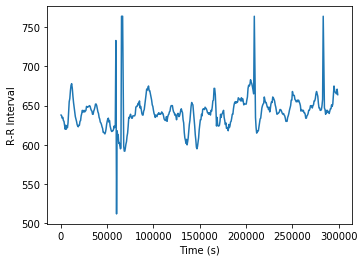




 74%|████████████████████████████████████████████████████████████▍                     | 42/57 [01:46<00:39,  2.61s/it]

1000.0
298
299
The SDNN is 21.381072499781734
The RMSSD is 20.196753159616815
The PNN50 is 1.079913606911447 %
The absolute power of the Low Frequency band is 44.43255877197749
New formula being used
The absolute power of the High Frequency band is 51.66598961359448
The LF/HF is 0.8599962780987027



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


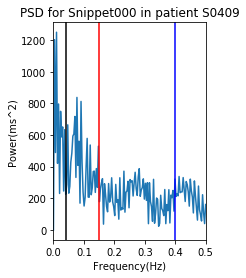

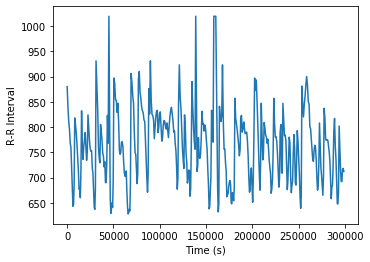

1000.0
298
299
The SDNN is 71.80187422268646
The RMSSD is 61.25727715005403
The PNN50 is 11.025641025641026 %
The absolute power of the Low Frequency band is 182.23969481574738
New formula being used
The absolute power of the High Frequency band is 210.24592622789072
The LF/HF is 0.8667929889790744



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


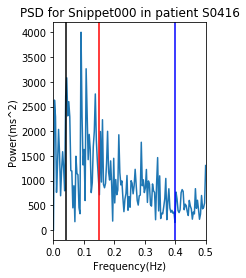

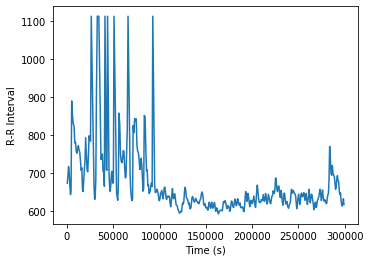

1000.0
299
299
The SDNN is 82.0858315758602
The RMSSD is 77.18600124020126
The PNN50 is 3.8636363636363633 %
The absolute power of the Low Frequency band is 98.73258920154466
New formula being used
The absolute power of the High Frequency band is 229.03768244364306
The LF/HF is 0.43107574329319703



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


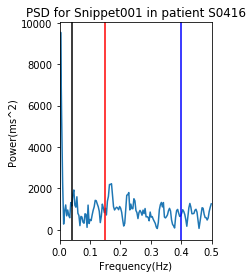

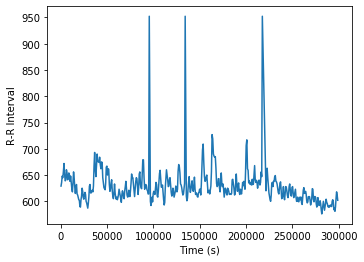

1000.0
298
299
The SDNN is 34.95308815788294
The RMSSD is 39.605768027508965
The PNN50 is 0.8492569002123143 %
The absolute power of the Low Frequency band is 51.625872625541525
New formula being used
The absolute power of the High Frequency band is 99.43096384553031
The LF/HF is 0.5192132372944129



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


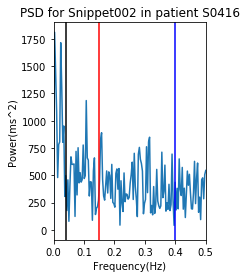

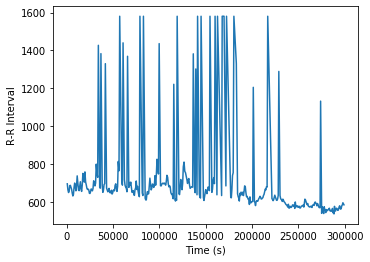

1000.0
299
299
The SDNN is 213.4639168392572
The RMSSD is 283.9961272780535
The PNN50 is 8.27250608272506 %
The absolute power of the Low Frequency band is 292.6574706298856
New formula being used
The absolute power of the High Frequency band is 550.5281443420937
The LF/HF is 0.5315940222813217



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


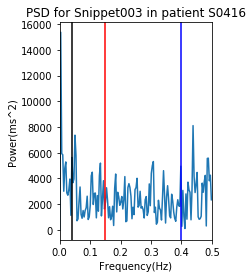

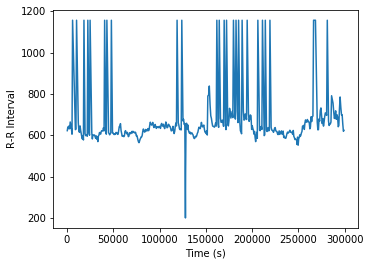




 77%|███████████████████████████████████████████████████████████████▎                  | 44/57 [01:52<00:35,  2.72s/it]

1000.0
299
299
The SDNN is 131.68708113120553
The RMSSD is 177.96294565789947
The PNN50 is 7.780320366132723 %
The absolute power of the Low Frequency band is 168.49912409931025
New formula being used
The absolute power of the High Frequency band is 369.73190516064966
The LF/HF is 0.4557332536019494



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


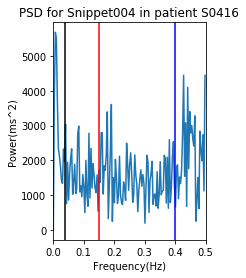

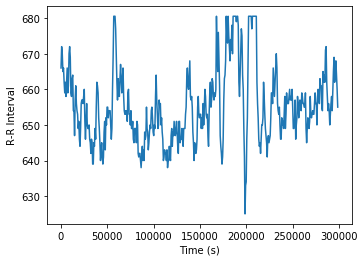

1000.0
298
299
The SDNN is 10.389776275518203
The RMSSD is 4.949296960795336
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 24.65093275548133
New formula being used
The absolute power of the High Frequency band is 16.002837764915487
The LF/HF is 1.5404100896108481



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


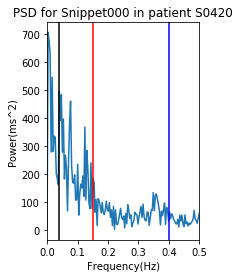

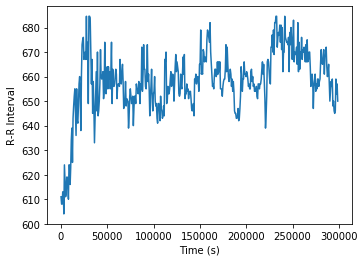

1000.0
298
299
The SDNN is 13.256143855586402
The RMSSD is 7.737593593021328
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 14.368419200719028
New formula being used
The absolute power of the High Frequency band is 23.31216103171427
The LF/HF is 0.6163486594474009



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


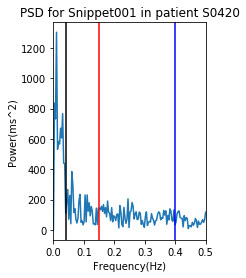

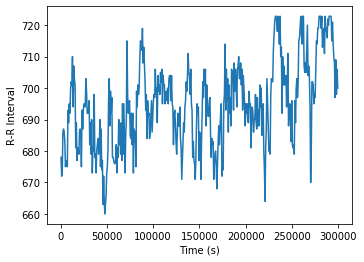

1000.0
299
299
The SDNN is 13.61945300900181
The RMSSD is 8.556648125605596
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 24.03508091343099
New formula being used
The absolute power of the High Frequency band is 22.93630373329224
The LF/HF is 1.047905590757584



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


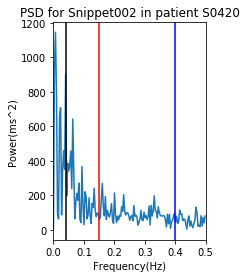

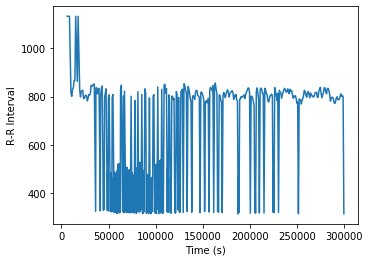

1000.0
299
294
The SDNN is 210.7345635489651
The RMSSD is 202.76269891064732
The PNN50 is 27.740492170022375 %
The absolute power of the Low Frequency band is 218.40600090446273
New formula being used
The absolute power of the High Frequency band is 618.3066051896603
The LF/HF is 0.35323252100382874



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


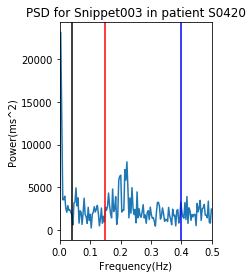

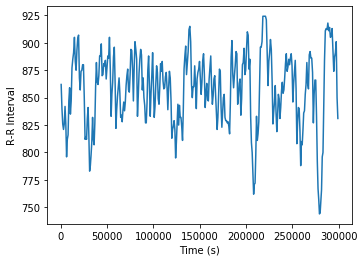




 79%|████████████████████████████████████████████████████████████████▋                 | 45/57 [01:59<00:46,  3.89s/it]

1000.0
298
299
The SDNN is 33.389060322764806
The RMSSD is 18.79575770864988
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 66.16020160252484
New formula being used
The absolute power of the High Frequency band is 63.14262449618197
The LF/HF is 1.0477898587589645



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


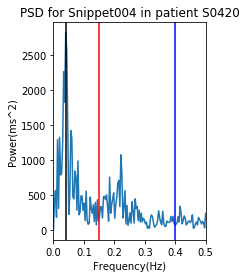

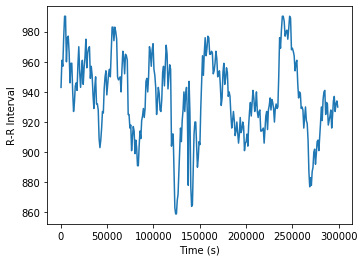

1000.0
298
299
The SDNN is 26.99053477890261
The RMSSD is 12.16854351670806
The PNN50 is 0.3125 %
The absolute power of the Low Frequency band is 41.42146209162197
New formula being used
The absolute power of the High Frequency band is 34.27380325380179
The LF/HF is 1.208545832655071



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


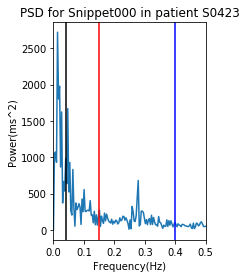

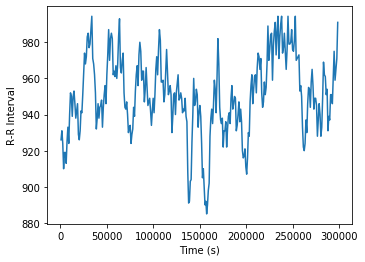

1000.0
298
298
The SDNN is 21.820904148956693
The RMSSD is 10.829427096612978
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 39.11204478679213
New formula being used
The absolute power of the High Frequency band is 29.603804755561498
The LF/HF is 1.3211830408199263



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


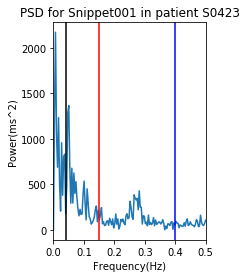

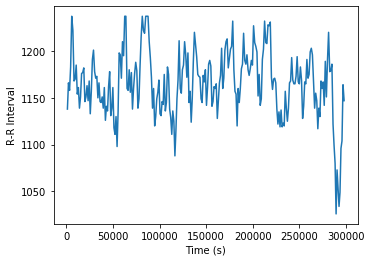

1000.0
298
298
The SDNN is 35.252605732870165
The RMSSD is 25.259563729232514
The PNN50 is 1.171875 %
The absolute power of the Low Frequency band is 69.94830920046324
New formula being used
The absolute power of the High Frequency band is 70.79395036270878
The LF/HF is 0.9880548951158545



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


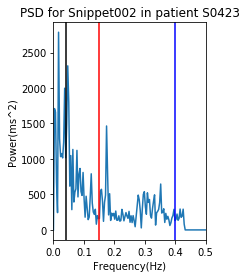

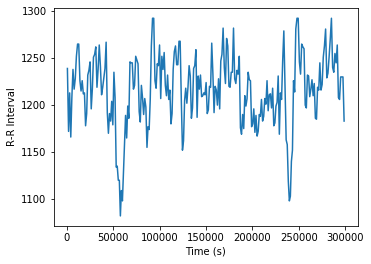

1000.0
298
298
The SDNN is 37.846973289107744
The RMSSD is 29.508054884870024
The PNN50 is 2.4390243902439024 %
The absolute power of the Low Frequency band is 73.71526874567775
New formula being used
The absolute power of the High Frequency band is 84.74457905996414
The LF/HF is 0.8698523205067524



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


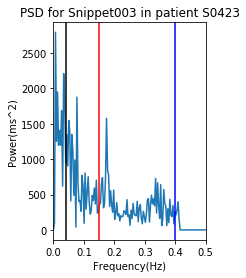

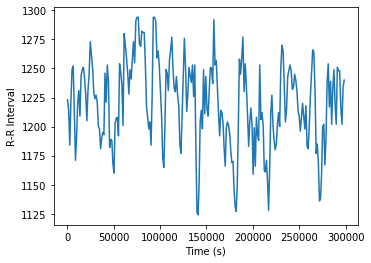




 81%|██████████████████████████████████████████████████████████████████▏               | 46/57 [02:04<00:47,  4.35s/it]

1000.0
298
298
The SDNN is 36.1938277117783
The RMSSD is 25.821198594760215
The PNN50 is 3.6734693877551026 %
The absolute power of the Low Frequency band is 75.2161191413612
New formula being used
The absolute power of the High Frequency band is 71.11170301033135
The LF/HF is 1.0577178714231263



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


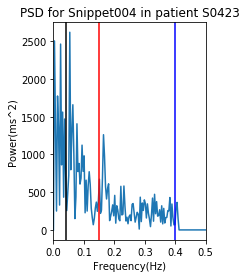

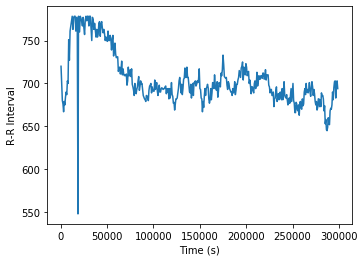

1000.0
298
299
The SDNN is 29.90281303664773
The RMSSD is 18.08253931998891
The PNN50 is 0.4716981132075472 %
The absolute power of the Low Frequency band is 33.70139143056255
New formula being used
The absolute power of the High Frequency band is 42.363086898913096
The LF/HF is 0.7955367254275142



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


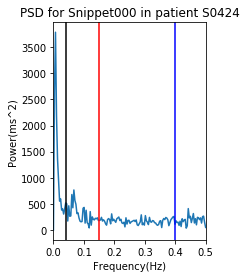

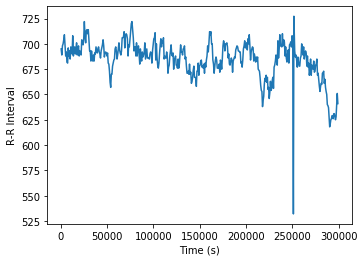




 82%|███████████████████████████████████████████████████████████████████▌              | 47/57 [02:06<00:36,  3.62s/it]

1000.0
299
299
The SDNN is 19.395142209851283
The RMSSD is 14.544467788880358
The PNN50 is 0.2288329519450801 %
The absolute power of the Low Frequency band is 29.88969306318421
New formula being used
The absolute power of the High Frequency band is 32.697301414829546
The LF/HF is 0.9141333311876322



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


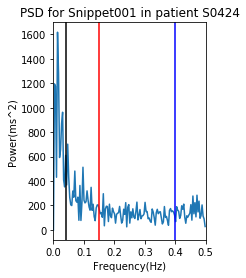

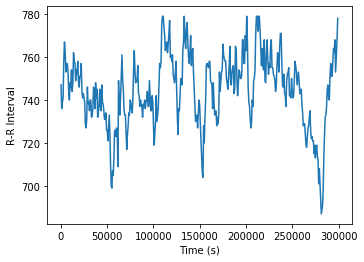

1000.0
298
299
The SDNN is 16.951339770146713
The RMSSD is 7.646084134160075
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 31.478170859867888
New formula being used
The absolute power of the High Frequency band is 23.756065276409167
The LF/HF is 1.3250582743231942



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


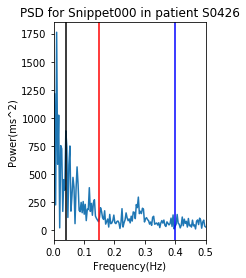

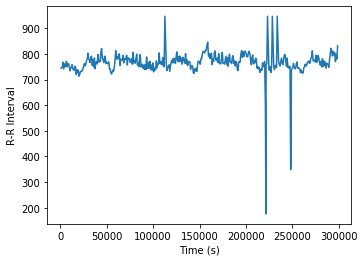

1000.0
298
299
The SDNN is 50.82384087329216
The RMSSD is 57.049905188890214
The PNN50 is 2.0618556701030926 %
The absolute power of the Low Frequency band is 89.71966553316624
New formula being used
The absolute power of the High Frequency band is 182.04978784404466
The LF/HF is 0.49283037676498564



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


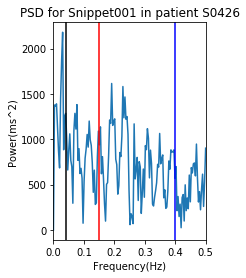

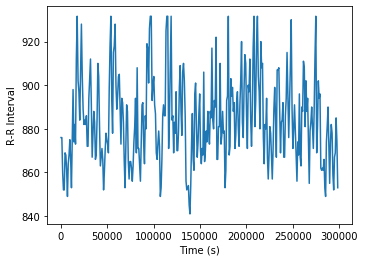

1000.0
298
299
The SDNN is 19.635716498056983
The RMSSD is 18.536068896506677
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 35.32236397620011
New formula being used
The absolute power of the High Frequency band is 47.28355674860944
The LF/HF is 0.7470327193023376



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


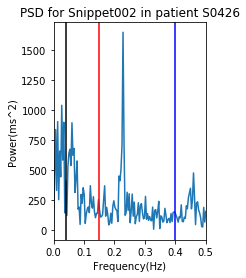

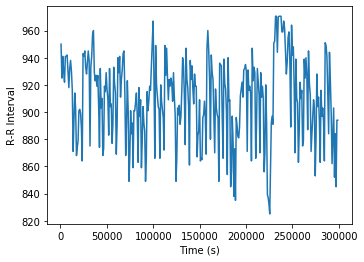

1000.0
298
299
The SDNN is 30.277086344824017
The RMSSD is 30.701274807298088
The PNN50 is 7.90273556231003 %
The absolute power of the Low Frequency band is 50.576818871649834
New formula being used
The absolute power of the High Frequency band is 71.45212650083072
The LF/HF is 0.7078420384180143



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


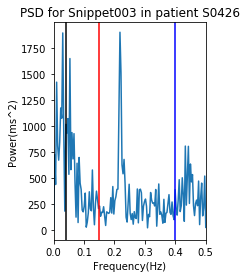

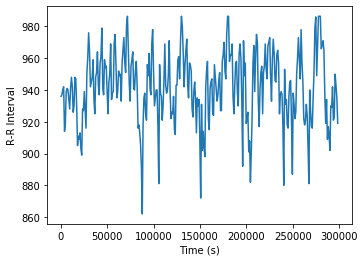




 84%|█████████████████████████████████████████████████████████████████████             | 48/57 [02:14<00:44,  4.90s/it]

1000.0
298
299
The SDNN is 22.11568130537901
The RMSSD is 19.646166411182904
The PNN50 is 2.20125786163522 %
The absolute power of the Low Frequency band is 39.64163130458441
New formula being used
The absolute power of the High Frequency band is 47.02668152714358
The LF/HF is 0.8429604219830703



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


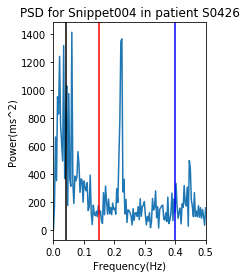

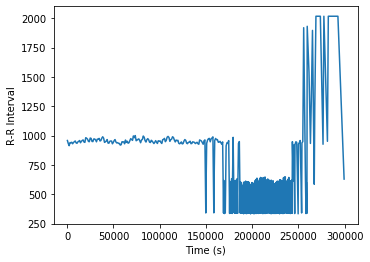

1000.0
299
300
The SDNN is 326.91004576798673
The RMSSD is 294.8305080192621
The PNN50 is 25.068119891008173 %
The absolute power of the Low Frequency band is 314.0568191108643
New formula being used
The absolute power of the High Frequency band is 726.6694873335282
The LF/HF is 0.43218660558224026



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


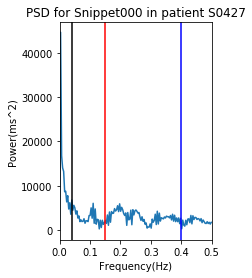

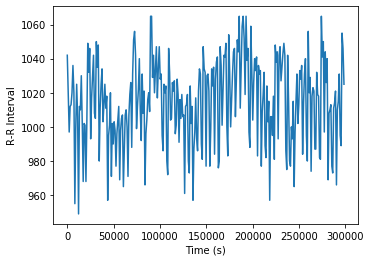

1000.0
298
299
The SDNN is 24.8551588772196
The RMSSD is 30.809738541970592
The PNN50 is 5.423728813559322 %
The absolute power of the Low Frequency band is 34.20509504663406
New formula being used
The absolute power of the High Frequency band is 76.03766774139281
The LF/HF is 0.4498440846840144



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


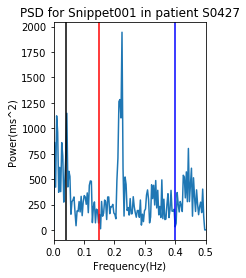

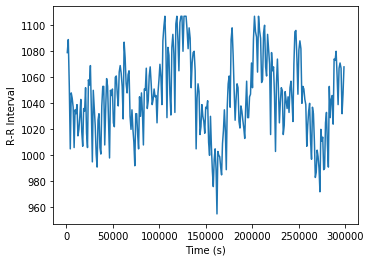

1000.0
298
298
The SDNN is 30.79021698829137
The RMSSD is 24.05896090195743
The PNN50 is 3.8461538461538463 %
The absolute power of the Low Frequency band is 30.35000387149447
New formula being used
The absolute power of the High Frequency band is 66.30888424423152
The LF/HF is 0.457706447897813



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


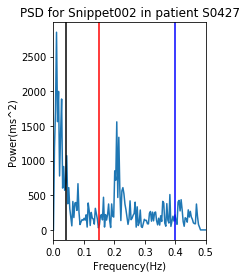

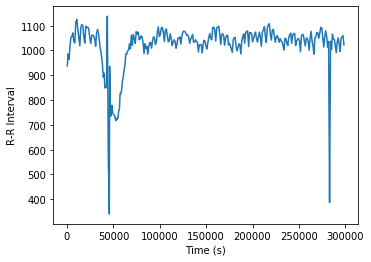

1000.0
298
299
The SDNN is 105.85989646144532
The RMSSD is 76.33380863114361
The PNN50 is 7.118644067796611 %
The absolute power of the Low Frequency band is 140.36807736466474
New formula being used
The absolute power of the High Frequency band is 229.68094089511018
The LF/HF is 0.6111437754374557



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


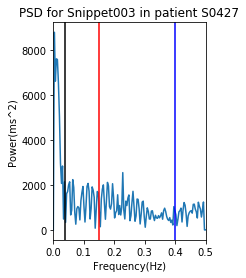

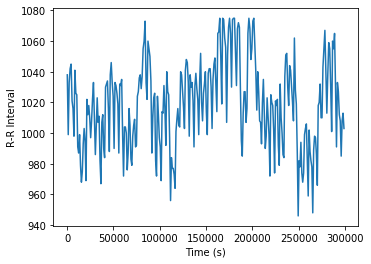




 86%|██████████████████████████████████████████████████████████████████████▍           | 49/57 [02:20<00:40,  5.10s/it]

1000.0
298
299
The SDNN is 27.935299773743314
The RMSSD is 23.347614746444815
The PNN50 is 3.4013605442176873 %
The absolute power of the Low Frequency band is 39.10681302364946
New formula being used
The absolute power of the High Frequency band is 61.513060842145464
The LF/HF is 0.635748123866006



In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


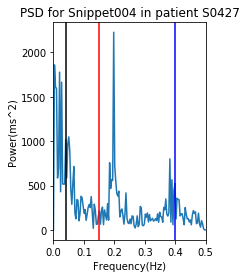

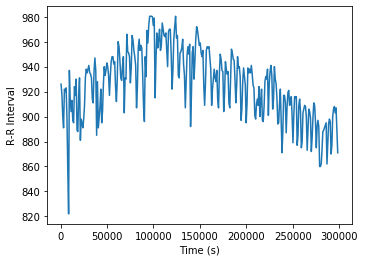

1000.0
298
298
The SDNN is 27.54278497269865
The RMSSD is 18.816800134664792
The PNN50 is 0.6191950464396285 %
The absolute power of the Low Frequency band is 37.35552206084551
New formula being used
The absolute power of the High Frequency band is 65.03194898679999
The LF/HF is 0.5744179998115669



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


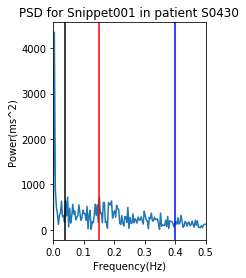

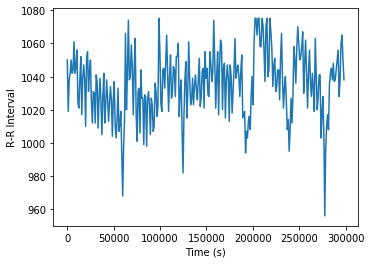

1000.0
298
299
The SDNN is 19.64205243966432
The RMSSD is 19.855416767970787
The PNN50 is 0.6920415224913495 %
The absolute power of the Low Frequency band is 32.049583538593346
New formula being used
The absolute power of the High Frequency band is 54.96628532240354
The LF/HF is 0.5830771235605101



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


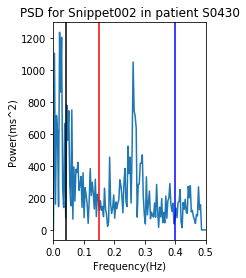

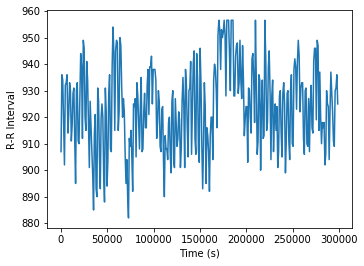

1000.0
298
299
The SDNN is 16.094362409751078
The RMSSD is 17.078730012972
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 17.71151755563557
New formula being used
The absolute power of the High Frequency band is 50.6827035978833
The LF/HF is 0.34945881530233264



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


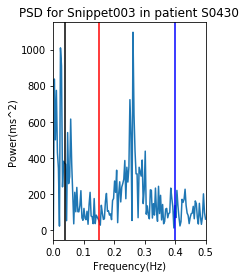

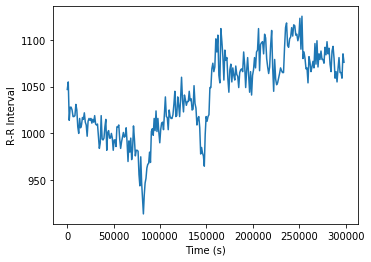




 88%|███████████████████████████████████████████████████████████████████████▉          | 50/57 [02:23<00:31,  4.54s/it]

1000.0
298
299
The SDNN is 42.81962983410323
The RMSSD is 15.816635246416896
The PNN50 is 0.3472222222222222 %
The absolute power of the Low Frequency band is 28.888275785967554
New formula being used
The absolute power of the High Frequency band is 49.21597061987929
The LF/HF is 0.5869695430592405



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


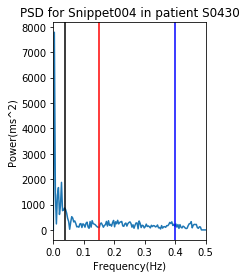

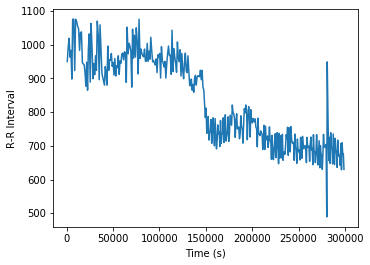

1000.0
299
299
The SDNN is 126.82125936824607
The RMSSD is 60.76884697599961
The PNN50 is 15.890410958904111 %
The absolute power of the Low Frequency band is 91.76256299390464
New formula being used
The absolute power of the High Frequency band is 138.79927235848203
The LF/HF is 0.6611170320612781



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


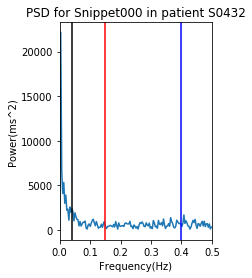

1000.0
299
299
The SDNN is 28.367215046492813
The RMSSD is 37.82871169659913
The PNN50 is 11.538461538461538 %
The absolute power of the Low Frequency band is 28.35272902518099
New formula being used
The absolute power of the High Frequency band is 67.70624818742671
The LF/HF is 0.4187608940713125



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


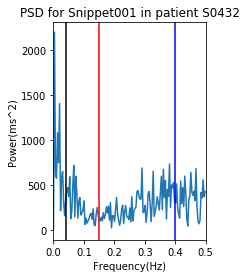

1000.0
298
299
The SDNN is 153.31786814218097
The RMSSD is 182.51389715383576
The PNN50 is 32.29166666666667 %
The absolute power of the Low Frequency band is 143.27941078371413
New formula being used
The absolute power of the High Frequency band is 499.026509527432
The LF/HF is 0.2871178345202479



In snippet folder Snippet003
In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


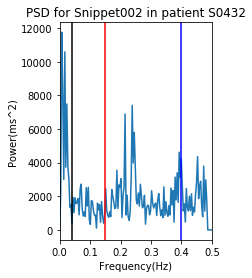

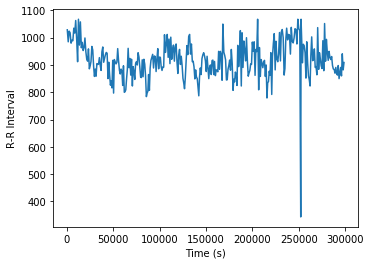




 89%|█████████████████████████████████████████████████████████████████████████▎        | 51/57 [02:27<00:26,  4.38s/it]

1000.0
298
299
The SDNN is 68.25808225833102
The RMSSD is 84.45263895171264
The PNN50 is 19.018404907975462 %
The absolute power of the Low Frequency band is 109.72595411870438
New formula being used
The absolute power of the High Frequency band is 189.52347276807956
The LF/HF is 0.5789570680407294



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


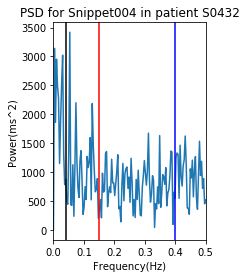

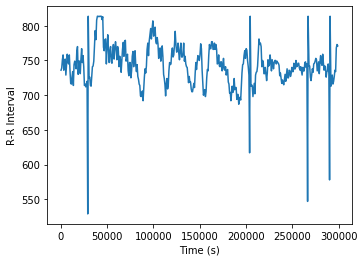

1000.0
299
299
The SDNN is 30.83905520710148
The RMSSD is 33.625269331957455
The PNN50 is 0.9925558312655087 %
The absolute power of the Low Frequency band is 48.445781722241165
New formula being used
The absolute power of the High Frequency band is 67.05412350414096
The LF/HF is 0.7224877336477208



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


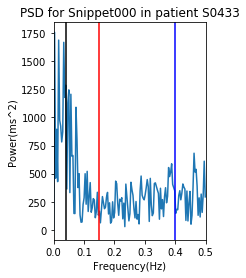

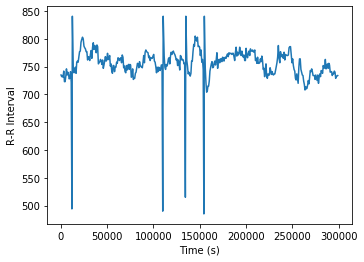

1000.0
298
299
The SDNN is 33.14772691573405
The RMSSD is 44.60890604868527
The PNN50 is 1.0101010101010102 %
The absolute power of the Low Frequency band is 41.72920006144233
New formula being used
The absolute power of the High Frequency band is 90.12300689005926
The LF/HF is 0.4630249422586136



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


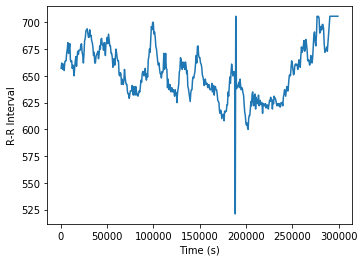

1000.0
299
299
The SDNN is 24.856636056915807
The RMSSD is 12.317321102342316
The PNN50 is 0.21834061135371177 %
The absolute power of the Low Frequency band is 28.00752967652104
New formula being used
The absolute power of the High Frequency band is 23.360409666059702
The LF/HF is 1.1989314432791447



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


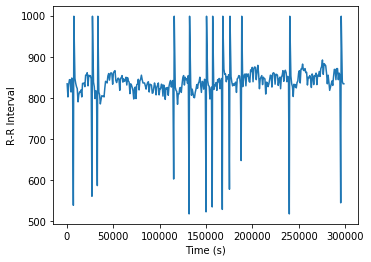

1000.0
298
298
The SDNN is 62.69779083801935
The RMSSD is 103.09703791099699
The PNN50 is 3.3707865168539324 %
The absolute power of the Low Frequency band is 50.33154947293285
New formula being used
The absolute power of the High Frequency band is 209.98266159756187
The LF/HF is 0.23969383514813614



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


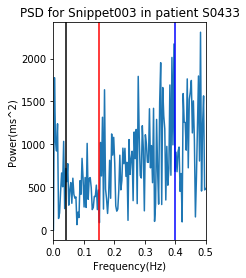

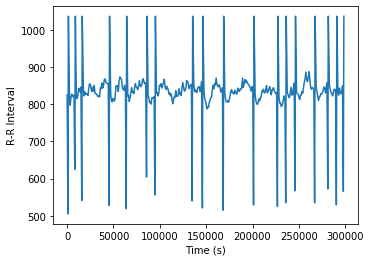




 91%|██████████████████████████████████████████████████████████████████████████▊       | 52/57 [02:35<00:27,  5.49s/it]

1000.0
298
299
The SDNN is 80.99948826603674
The RMSSD is 137.03126415685182
The PNN50 is 5.027932960893855 %
The absolute power of the Low Frequency band is 57.75455017296468
New formula being used
The absolute power of the High Frequency band is 256.64155590715677
The LF/HF is 0.22503974451377662



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


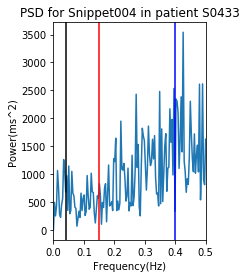

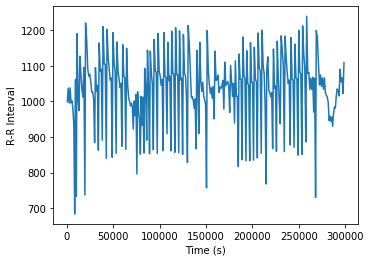

1000.0
298
299
The SDNN is 103.95676156875062
The RMSSD is 164.20838731218274
The PNN50 is 20.0 %
The absolute power of the Low Frequency band is 110.75116052630378
New formula being used
The absolute power of the High Frequency band is 386.0073221524513
The LF/HF is 0.2869146624181478



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


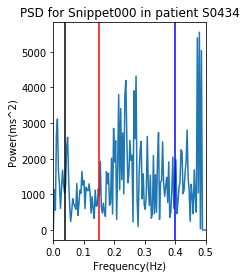

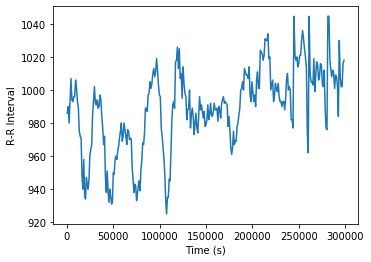

1000.0
298
298
The SDNN is 24.927343738657587
The RMSSD is 12.153452062300316
The PNN50 is 0.9933774834437087 %
The absolute power of the Low Frequency band is 29.86042478225128
New formula being used
The absolute power of the High Frequency band is 33.32926095260113
The LF/HF is 0.8959221995566291



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


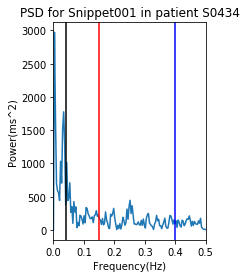

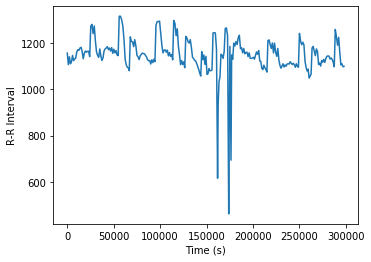

1000.0
297
298
The SDNN is 84.66955942687902
The RMSSD is 90.82140709188324
The PNN50 is 7.662835249042145 %
The absolute power of the Low Frequency band is 187.6588339932625
New formula being used
The absolute power of the High Frequency band is 285.16600865125514
The LF/HF is 0.6580687329490261



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


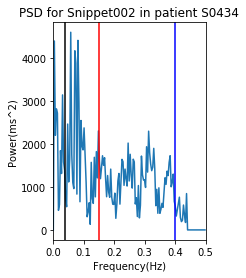

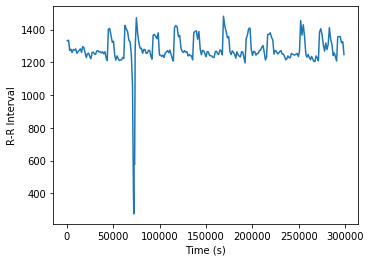

1000.0
298
299
The SDNN is 123.32717228931307
The RMSSD is 85.52859419826748
The PNN50 is 6.779661016949152 %
The absolute power of the Low Frequency band is 352.8810192929934
New formula being used
The absolute power of the High Frequency band is 188.2792615046955
The LF/HF is 1.8742426355023327



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


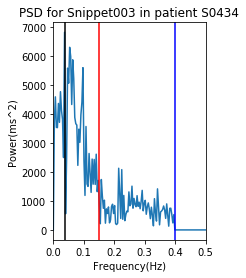

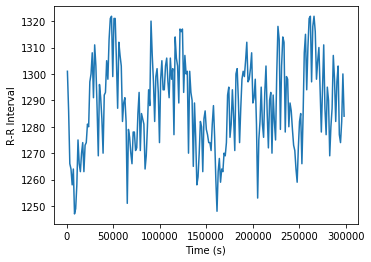




 93%|████████████████████████████████████████████████████████████████████████████▏     | 53/57 [02:39<00:20,  5.19s/it]

1000.0
298
298
The SDNN is 16.87269571206355
The RMSSD is 14.242165863086065
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 22.962320319490427
New formula being used
The absolute power of the High Frequency band is 39.58608562885499
The LF/HF is 0.580060391289428



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


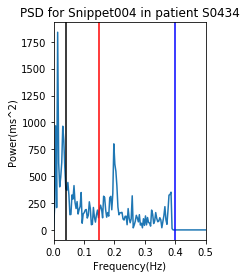

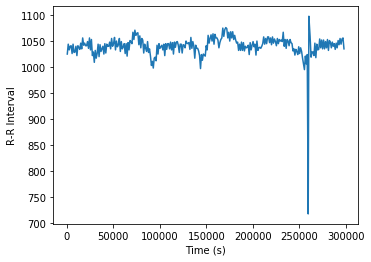

1000.0
298
298
The SDNN is 23.757188840432768
The RMSSD is 32.32787151281906
The PNN50 is 0.34843205574912894 %
The absolute power of the Low Frequency band is 31.63142214695954
New formula being used
The absolute power of the High Frequency band is 91.49163142459271
The LF/HF is 0.34573022313008067



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


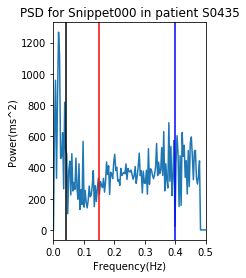

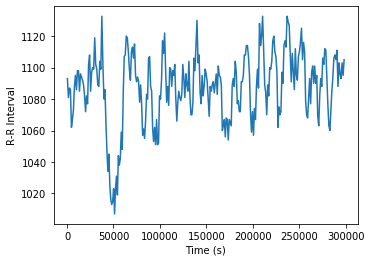

1000.0
298
298
The SDNN is 22.539789098134143
The RMSSD is 13.738305723424913
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 45.063506208210924
New formula being used
The absolute power of the High Frequency band is 33.8312777958336
The LF/HF is 1.3320072177043398



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


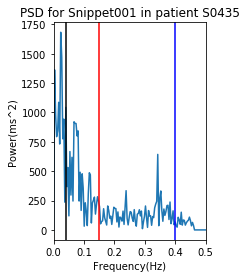

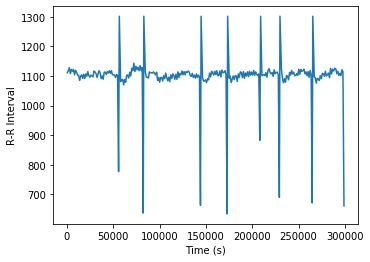

1000.0
298
299
The SDNN is 77.95058027711627
The RMSSD is 125.08952438276809
The PNN50 is 2.5830258302583027 %
The absolute power of the Low Frequency band is 93.54634357941703
New formula being used
The absolute power of the High Frequency band is 329.80953693309476
The LF/HF is 0.2836374728557163



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


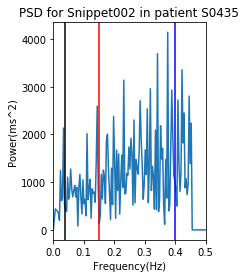

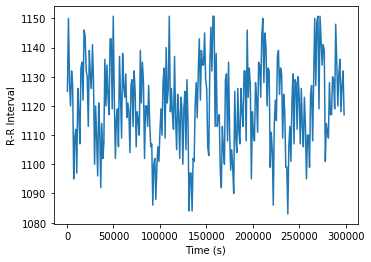

1000.0
298
298
The SDNN is 14.978224388033086
The RMSSD is 16.72439438306939
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 30.267864134461227
New formula being used
The absolute power of the High Frequency band is 42.4925050949858
The LF/HF is 0.7123106549449563



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


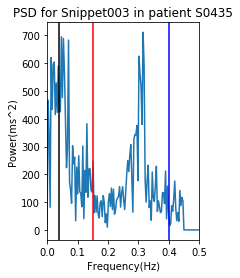

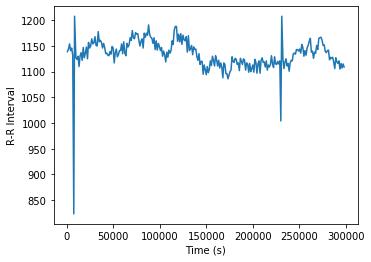




 95%|█████████████████████████████████████████████████████████████████████████████▋    | 54/57 [02:45<00:15,  5.21s/it]

1000.0
298
298
The SDNN is 30.72797886576822
The RMSSD is 36.97944763134681
The PNN50 is 0.7604562737642585 %
The absolute power of the Low Frequency band is 39.93728989269941
New formula being used
The absolute power of the High Frequency band is 110.0096284928202
The LF/HF is 0.3630344947061241



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


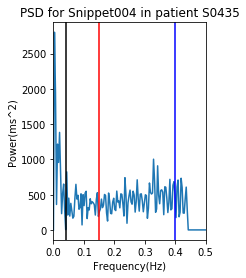

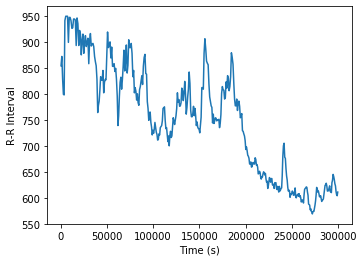

1000.0
299
299
The SDNN is 105.71359647765318
The RMSSD is 19.387416939241124
The PNN50 is 0.9852216748768473 %
The absolute power of the Low Frequency band is 85.40613674458717
New formula being used
The absolute power of the High Frequency band is 75.13710227146137
The LF/HF is 1.1366706216061542



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


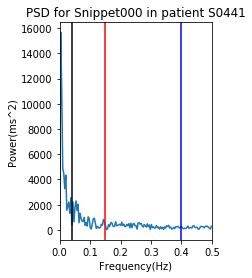

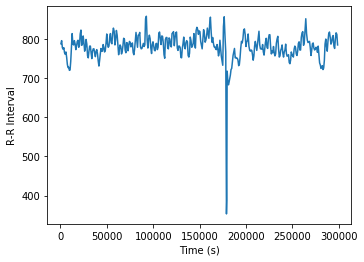

1000.0
298
299
The SDNN is 39.61994095946376
The RMSSD is 32.68583233187231
The PNN50 is 0.78125 %
The absolute power of the Low Frequency band is 72.11800743651413
New formula being used
The absolute power of the High Frequency band is 129.30400363008965
The LF/HF is 0.557739941624916



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


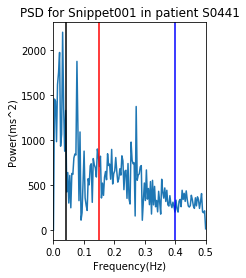

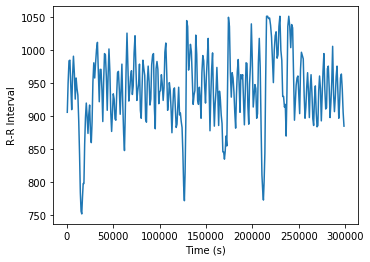

1000.0
298
299
The SDNN is 55.031952533003384
The RMSSD is 39.98665647917417
The PNN50 is 10.031347962382444 %
The absolute power of the Low Frequency band is 129.20425653652606
New formula being used
The absolute power of the High Frequency band is 112.23845210557765
The LF/HF is 1.15115857455865



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


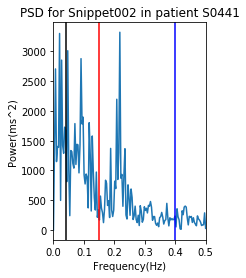

1000.0
298
299
The SDNN is 59.36729876633409
The RMSSD is 37.23383417524769
The PNN50 is 8.256880733944955 %
The absolute power of the Low Frequency band is 138.4782619343998
New formula being used
The absolute power of the High Frequency band is 115.46570944726459
The LF/HF is 1.1993020490437942



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


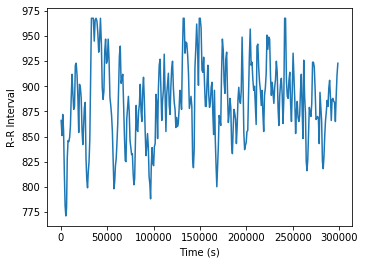




100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [02:51<00:00,  3.00s/it]

1000.0
298
298
The SDNN is 40.075041970904834
The RMSSD is 25.114340843520456
The PNN50 is 3.2544378698224854 %
The absolute power of the Low Frequency band is 92.24455265255541
New formula being used
The absolute power of the High Frequency band is 77.7668685341168
The LF/HF is 1.1861677651593643





In [32]:
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        print("In snippet folder " + snip_folder)
                        
                        ### NOW IN CORRECT FOLDER ###
                        path_snip =path_folder + '/' + snip_folder
                        if _check_valid(path_snip):
                            para = _hrv_analysis(path_snip)
                            _save_parameters(para, path_snip)
                            print('\n\n')